**Autor:** Andrej Gajdoš  <br> 
_[Ústav matematických vied](https://www.upjs.sk/prirodovedecka-fakulta/ustav/umv/), [Prírodovedecká fakulta](https://www.upjs.sk/prirodovedecka-fakulta/), Univerzita Pavla Jozefa Šafárika v Košiciach,_ <br> 
email: [andrej.gajdos@upjs.sk](mailto:andrej.gajdos@upjs.sk)
*** 

**_Tento materiál vznikol za podpory grantu VVGS-2022-2412._**

***

**<font size=6 color=gold> NUM: Téma 2 - Aproximácia funkcií </font>** 

--- 

<a id=table_of_contents></a>
##  Obsah 

* [Úvod](#uvod) 


* [Aproximácia pomocou polynómov](#polynomy) 


* [Aproximácia po častiach polynomickými funkciami (splajny)](#splajny) 


* [Aproximácia metódou najmenších štvorcov](#mns) 


* [Použité zdroje](#zdroje) 


**Pre návrat na obsah stlačte klávesu <font color=brown>Home</font>.** 

--- 

In [1]:
# nacitanie potrebnych balikov v Python-e 
import math 
import numpy as np 
import sympy as sym 
import scipy as sci 
from decimal import Decimal
from matplotlib import pyplot as plt

***
<a id=uvod></a>
 # <font color=brown> Úvod </font> 

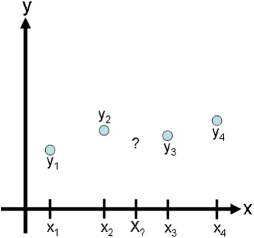 
$$\text{Zdroj: Kong et al. (2020).}$$

**Aproximovať funkciu $y=f(x)$** znamená nahradiť ju funkciou $\varphi(x)$, ktorá je ku $f(x)$ v istom zmysle blízka, čo označujeme $\varphi(x)\approx f(x)$. Budeme sa zaoberať predovšetkým dvoma druhmi aproximácie: 

* **_Interpolácia_** - aproximácia, pri ktorej $\varphi(x)$ nadobúda v zadaných bodoch $x_i$ predpísané hodnoty $y_i=f(x_i)$, t. j. $\varphi(x_i)=y_i$. Niekedy sa naviac požaduje, aby funkcie $\varphi$ a $f$ mali v bodoch $x_i$ rovnaké derivácie. 

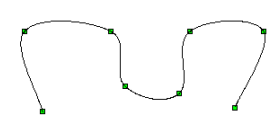

* **_Metóda najmenších štvorcov_** - aproximácia, pri ktorej "prekladáme" funkciu $\varphi$ cez zadané body $[x_i,y_i]$ tak, aby "vzdialenosť" funkcií $f$ a $\varphi$ bola v istom zmysle minimálna. Je pri tom typické, že funkcia $\varphi$ neprechádza priamo  bodmi $[x_i,y_i]$. 

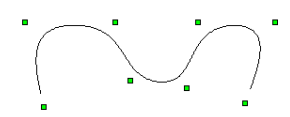 

Aproximácia $\varphi(x)$ sa využíva k približnému výpočtu hodnôt funkcie $f(x)$ napr. pri vykresľovaní $\varphi\approx f$. Je teda žiadúce aby výpočet $\varphi(x)$ bol jednoduchý. Preto sa $\varphi$ častokrát hľadá v tvare polynómu. Vo všeobecnosti sa $\varphi$ používa k riešeniu úloh, kde vystupuje funkcia $f$, ktorú je výhodné alebo dokonca nevyhnutné nahradiť jej vhodnou aproximáciou $\varphi$. Ako príklad je možné uviesť výpočet derivácie alebo určitého integrálu: v takom prípade $f'(x)$ nahradíme pomocou $\varphi'(x)$ a $\int_{a}^{b}f(x)\,\mathrm{d}x$ nahradíme pomocou $\int_{a}^{b}\varphi(x)\,\mathrm{d}x$. 

---

#### Poznámka 1 

Krivka na druhom obrázku hore sa niekedy označuje ako **interpolačná** (prechádza cez zadané body - _interpolačné uzly_). Krivka na treťom obrázku hore sa zvykne označovať ako **aproximačná** (zväčša neprechádza priamo cez zadané body, iba v ich blízkosti). My však **aproximáciu nejakej funkcie chápeme ako všeobecnejší pojem** (zahŕňa druhý aj tretí obrázok uvedený vyššie) a rozlišujeme rôzne prístupy k aproximácii, pričom niektoré z nich si objasníme v rámci tejto témy. 
 
---

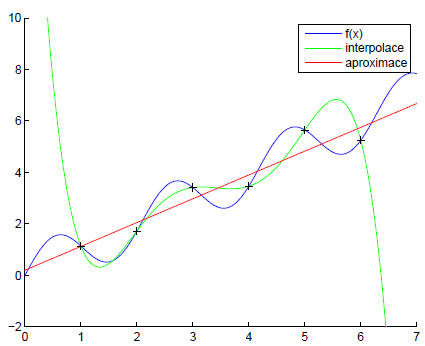 

Ďalej budeme uvažovať špecifický vektorový priestor $V$ ako napr. $C\langle 0,1 \rangle$, odkiaľ bude daná funkcia $f$. Spolu s $V$ budeme uvažovať rôzne (pod)priestory $W$ (častokrát $W\subset V$) - konkrétne pôjde o (pod)priestory "pekných" resp. "rozumných" funkcií, napr. priestor polynómov / trigonometrických funkcií či po častiach spojitých polynómov a pomocou nich sa budeme snažiť čo najlepšie aproximovať funkciu $f$ (ktorá bude väčšinou zadaná len dvojicami niekoľkých bodov v tvare $[x_i,y_i]$, kde $y_i=f(x_i)$). 

***
<a id=polynomy></a>
 # <font color=brown> Aproximácia pomocou polynómov </font> 

Najjednoduchší výber pre $W$ je množina polynómov - s nimi sa ľahko pracuje. Navyše, nasledujúca Veta (Weierstrassova o aproximácii) hovorí, že aj polynómy môžu poskytnúť dobrú aproximáciu funkcie. 

--- 

### <font color=green> Veta 1 (Weierstrassova o aproximácii) </font> 

Nech je daná funkcia $f\in C\langle a,b \rangle$ a $\varepsilon>0$. Potom existuje polynóm $p(x)$ taký, že platí 

$$\parallel p-f \parallel_{\infty}=\underset{a\le x \le b}{\max}\mid f(x)-p(x) \mid<\varepsilon$$

---

---

#### Poznámka 2 

Výsledok uvedený vo Vete 1 je trochu prekvapivý lebo od funkcie $f$ sa vyžaduje iba spojitosť, pričom polynómy sú hladké funkcie (dokonca nekonečne veľa krát diferencovateľné). Totiž funkcia $f$ môže vyzerať ako na grafe nižšie (funkcia nie je hladká - zrejme v niektorých bodoch nie je diferencovateľná), napriek tomu je možné nájsť polynóm $p(x)$ taký, že bude platiť $\parallel p-f \parallel_{\infty}<\varepsilon$, nehľadiac na to, aké malé $\varepsilon$ zvolíme. 

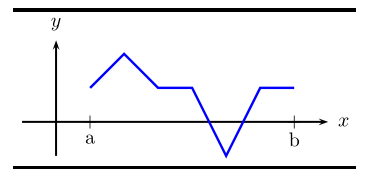 
$$\text{Zdroj: Ackleh et al. (2009).}$$ 

Intuitívny pohľad je taký, že graf polynómu je totiž možné ľubovoľne ovplyvňovať (meniť jeho sklon) napr. zmenou stupňa polynómu a pri voľbe dostatočne vysokého stupňa vieme dostať graf polynómu podľa potreby ... Na druhej strane Veta 1 má skôr teoretický význam a nie je vhodná pre praktické nájdenie polynómu $p(x)$ (aj preto jej dôkaz vynecháme; v dôkaze sa obajvujú i tzv. **_Bernsteinove polynómy_** - viac info napr. [tu](https://mathworld.wolfram.com/BernsteinPolynomial.html) alebo [tu](https://faculty.engineering.ucdavis.edu/farouki/wp-content/uploads/sites/51/2021/07/Bernstein-polynomial-basis.pdf)). 

---

**Weierstrassova aproximačná veta nám teda hovorí, že polynómy môžu byť dobrou aproximáciou spojitých funkcií.** Bernsteinove polynómy síce nepatria medzi často využívané (až na určité výnimky napr. pri renderovaní počítačovej grafiky), no predstavíme si ďalej iné možnosti ako získať presné polynomiálne aproximácie funkcií. Pred tým však ešte jednododuchý príklad. 

--- 

#### <font color=blue> Príklad 1 </font> 

Ak neberieme od úvahy konštantnú funkciu - teda polynóm stupňa 0, tak najjednoduchším prípadom aproximácie pomocou polynómu je aproximácia polynómom prvého stupňa - t. j. pomocou priamky. a ide o tzv. **_lineárnu interpoláciu_**. Myšlienka spočíva v predpoklade, že bod $[x,y]$, ktorého $y$-ovú súradnicu chceme aproximovať (resp. interpolovať), leží na priamke (resp. úsečke) spájajúcej známe susedné dva body. Konkrétne teda poznáme súradnicu $x$ a vezmeme dva známe body $[x_i,y_i]$, $[x_{i+1},y_{i+1}]$ tak, aby platilo $x_i<x<x_{i+1}$ a hodnotu $y$ zistíme (dopočítame) vďaka priamke prechádzajúcej bodmi $[x_i,y_i]$, $[x_{i+1},y_{i+1}]$. Túto približnú hodnotu (neznámej) súradnice $y$ bodu $[x,y]$ označíme $\hat{y}$, pričom platí 

$$\hat{y}=\hat{y}(x)=y_i+\dfrac{(y_{i+1}-y_i)(x-x_i)}{x_{i+1}-x_i},$$ 

a teda bod $[x,\hat{y}]$, kde $\hat{y}$ je aproximáciou (neznámej) hodnoty $y$, leží na spomínanej priamke prechádzajúcej bodmi $[x_i,y_i]$, $[x_{i+1},y_{i+1}]$, kde $x_i<x<x_{i+1}$. 

Teraz nájdeme lineárnu interpoláciu v bode $x=1.5$, ak sú dané tieto body: $[0,1],[1,3],[2,2]$. 

**Keďže $1<x<2$, tak na výpočet lineárnej interpolácie využijeme druhý a tretí zadaný bod.** Po dosadení súradníc bodov do vyššie uvedeného vzťahu pre lineárnu interpoláciu, dostávame 

$$\hat{y}=\hat{y}(1.5)=3+\dfrac{(2-3)(1.5-1)}{2-1}=2.5$$ 

Na uvedenú interpoláciu slúži funkcia `interp1d()` z balíka *SciPy* z modulu *interpolate*. 

In [7]:
from scipy.interpolate import interp1d

plt.style.use('seaborn-poster')

In [8]:
x = [0, 1, 2]
y = [1, 3, 2]

f = sci.interpolate.interp1d(x, y) # interpolacia priamkou (linearnou funkciou resp. polynomom stupna 1) 
y_hat = f(1.5) # aproximacia funkcnej hodnoty v bode x=1.5 pomocou priamky  
print(y_hat)

2.5


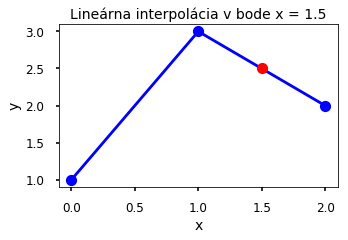

In [31]:
plt.figure(figsize = (5,3))
plt.plot(x, y, '-ob') # znazornenie povodnych/zadanych bodov 
plt.plot(1.5, y_hat, 'ro') # znazornenie interpolovaneho bodu  
plt.title('Lineárna interpolácia v bode x = 1.5', fontsize=14)
plt.xlabel('x', fontsize=14) 
plt.xticks(fontsize=12)
plt.ylabel('y', fontsize=14) 
plt.yticks(fontsize=12)
plt.show()

--- 

<font color=orange> Odvoďte resp. vysvetlite vzťah pre lineárnu interpoláciu uvedený v Príklade 1. Môžete k tomu využiť vhodný tvar rovnice priamky. </font> 

--- 

## Taylorov polynóm

Pripomeňme, že ak $f\in C^n\langle a,b \rangle$ a $f^{(k+1)}$ existuje na $\langle a,b \rangle$, potom pre $x_0\in \langle a,b \rangle$ existuje $\xi(x)$ medzi $x_0$ a $x$ také, že $f(x)=T_n(x)+R_n(x)$, kde 

$$T_n(x)=\displaystyle\sum\limits_{k=0}^{n}\dfrac{f^{(k)}(x_0)}{k!}(x-x_0)^k$$ 

a 

$$R_n(x)=\displaystyle\int_{x_0}^{x}\dfrac{(x-t)^n}{n!}f^{(n+1)}(t)\,\mathrm{d}t=\dfrac{f^{(n+1)}\left(\xi(x)\right)(x-x_0)^{n+1}}{(n+1)!}.$$ 

Zrejme $T_n(x)$ je Taylorov polynóm pre $f(x)$ v bode $x$, ktorý je z (blízkeho) okolia bodu $x_0$ a $R_n(x)$ je chybový člen resp. zvyšok Taylorovho radu (po $n$-tom člene). Je známe, že Taylorov polynóm je dobrou aproximáciou len pre $x$ blízke $x_0$. V opačnom prípade môže byť aproximácia dosť nepresná. Naviac, Taylorov rad vyžaduje dostatočne hladkú funkciu (dostatočne veľa krát diferencovateľnú v bode $x_0$). Napriek tomu je možné použiť techniky automatickej diferenciácie (ako bude vysvetlené v téme 3), na získanie derivácií vyššieho rádu pre komplikované ale hladké funkcie. 

--- 

#### <font color=blue> Príklad 2 </font> 

Aproximácia funkcie $e^{-x}$ v okolí bodu $x_0=0.5$ Taylorovym polynómom.  Inými slovami, využije sa informácia v bode $x_0=0.5$ na aproximáciu $e^{-x}$ pomocou Taylorovho polynómu s rôznym počtom členov. Druhý graf zobrazuje chybu aproximácie (skutočnosť - aproximácia). 


In [1]:
# reset default font size on plots
from matplotlib import rcParams
rcParams.update({'font.size': 12})

# produce vector inline graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import matplotlib.pyplot as plt

C:\Users\PC\AppData\Local\Temp\ipykernel_17652\1467116687.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


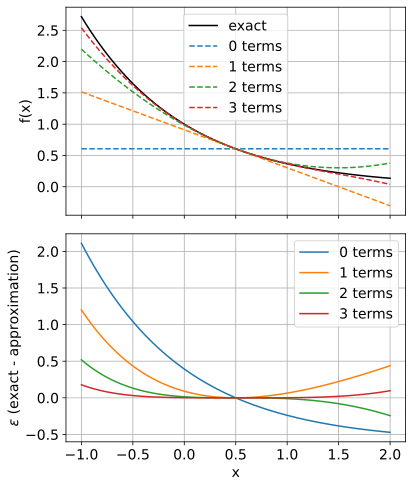

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

x = np.linspace(-1,2,100)
exact = np.exp(-x)

x0 = 0.5

n = 4
terms = np.array([(x-x0)**i/factorial(i) * (-1)**i * np.exp(-x0) for i in range(0,n) ])

f, ax = plt.subplots(2, sharex=True, figsize=(6,7))
# f, ax = plt.subplots(2, sharex=True, figsize=plt.figaspect(1.5))

ax[0].plot(x,exact,'k',label='exact')

for i in range(0,n):
    taylor = np.sum( terms[0:i+1,:], axis=0 )
    ax[0].plot(x,taylor,'--',label=str(i)+' terms')
    ax[1].plot(x,exact-taylor,label=str(i)+' terms')   

ax[0].set_ylabel('f(x)')
ax[0].legend(loc='upper center')
ax[0].grid(True)

ax[1].set_xlabel('x')
ax[1].set_ylabel('$\epsilon$ (exact - approximation)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()  # ensures that the axis labels export properly
# plt.savefig('taylor-exp-err.pdf')

--- 

## Lagrangeova interpolácia 

<ins> Formulácia problému: </ins> 

Je daných $n+1$ rôznych reálnych čísel (uzlov; ang. *nodes*) $x_0,x_1,\ldots,x_n$ a $n+1$ ľubovoľných reálnych čísel $y_0,y_1,\ldots,y_n$. Nájdite polynóm $p(x)$ stupňa najviac $n$, ktorý spĺňa $p(x_j)=y_j$ pre $j=0,1,\ldots,n$. 

--- 

### <font color=green> Veta 2  </font> 

Pre $n+1$ rôznych reálnych čísel $x_0,x_1,\ldots,x_n$ a $n+1$ ľubovoľných reálnych čísel $y_0,y_1,\ldots,y_n$ existuje jedinečný interpolačný polynóm $p(x)$ stupňa najviac $n$, ktorý spĺňa $p(x_j)=y_j$ pre $j=0,1,\ldots,n$. Platí $p(x)=\sum\limits_{K=0}^{N}y_kl_k(x)$ $l_k(x)=\prod\limits_{j=0\\j\neq k}^{n}\dfrac{x-x_j}{x_k-x_j}$. 

--- 

Ak to zosumarizujeme, tak máme **_Lagrangeov tvar_** (jednoznačne určeného) **_interpolačného polynómu_**: 

\begin{equation*} \label{eq:LagInterpPolyn} \tag{1} 
p(x)=\sum\limits_{K=0}^{N}y_kl_k(x) \quad \text{ pričom } \quad l_k(x)=\prod\limits_{j=0\\j\neq k}^{n}\dfrac{x-x_j}{x_k-x_j},
\end{equation*} 

kde $\{l_k\}_{k=0}^{n}$ le **_Lagrangeova báza_** priestoru polynómov stupňa $n$ asociovaných s množinou bodov $\{x_i\}_{i=0}^n$ a $l_k$ budeme nazývať **_Lagrangeove bázické funkcie_**.  Niekedy sa Lagrangeov polynóm miesto $p(x)$ označuje ako $p_n(x)$ alebo $L(x)$ či $L_n(x)$ (ak chceme zdôrazniť i počet uzlov). 

---

#### Poznámka 2 

Dôležitou črtou Lagrangeovej bázy je to, že ide o tzv. *kolokačnú bázu*. Hlavnou vlastnosťou takej bázy je, že maticou sústavy rovníc, ktorá sa má vyriešiť pre získanie koeficientov, je matica identity. Teda matica pre sústavu rovníc 

$$\{p(x_i)=y_i\}_{i=0}^{n},$$

ktorú je potrebné vyriešiť vzhľadom na $c_i$, kde 

$$p(x)=\displaystyle\sum\limits_{k=0}^{n}c_kl_k(x),$$ 

je v tvare 

\begin{equation*} \label{eq:LagInterpPolynEqSys} \tag{2} 
\begin{pmatrix} 
l_0(x_0) & l_1(x_0) & \ldots & l_n(x_0) \\ 
l_0(x_1) & l_1(x_1) & \ldots & l_n(x_1) \\ 
  & \vdots & \ddots &  \vdots \\ 
l_0(x_n) & l_1(x_n) & \ldots & l_n(x_n)  
\end{pmatrix}
\begin{pmatrix}
c_0\\
c_1\\
\vdots \\
c_n
\end{pmatrix}=
\begin{pmatrix}
y_0\\
y_1\\
\vdots \\
y_n
\end{pmatrix}
\end{equation*}

Všimnite si rozdiel oproti Vandermondovej matici, kde bolo použité $x^k$ miesto $l_k(x)$. V skutočnosti nie je potrebná žiadna veľká námaha pre vyriešenie \eqref{eq:LagInterpPolynEqSys}. 

---

--- 

#### <font color=blue> Príklad 3 </font> 

Sú dané uzly $x_0=0,x_1=1,x_2=2$ a príslušné funkčné hodnoty v nich $y_0=1,y_1=3,y_2=2$. Podľa vzťahu $(1)$ nájdeme odpovedajúce Lagrangeove bázické polynómy. Výpočtom dostaneme (overte!) 

$$l_1(x)=\dfrac{1}{2}\left(x^2-3x+2\right),$$ 

$$l_2(x)=-x^2+2x,$$ 

$$l_3(x)=\dfrac{1}{2}\left(x^2-x\right).$$

Nasledujúci kód slúži pre vykreslenie grafov týchto funkcií. 

In [82]:
import numpy.polynomial.polynomial as poly
# plt.style.use('seaborn-poster')

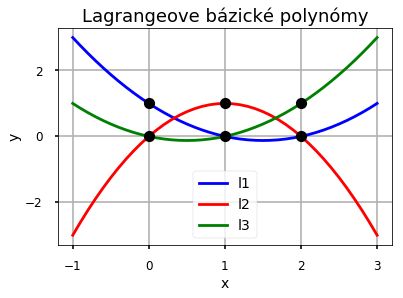

In [94]:
x = [0, 1, 2] # zadane uzly 
y = [1, 3, 2]
# koeficienty pre Lagrangeove bazicke polynomy l_k (pozri vyssie v texte)
l1_coeff = [1,-1.5,.5]
l2_coeff = [0, 2,-1]
l3_coeff = [0,-.5,.5]

# ziskanie polynomickych funkcii l_k pre k = 0,1,2 - vztah (1) vyssie v texte 
l1 = poly.Polynomial(l1_coeff)
l2 = poly.Polynomial(l2_coeff)
l3 = poly.Polynomial(l3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1) # vygenerovane ekvidistantne body (krok h=0.1) pre vykreslenie grafov na intervale od -1 po 3 

fig = plt.figure(figsize = (6,4))
plt.plot(x_new, l1(x_new), 'b', label = 'l1')
plt.plot(x_new, l2(x_new), 'r', label = 'l2')
plt.plot(x_new, l3(x_new), 'g', label = 'l3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrangeove bázické polynómy', fontsize=18)
plt.xlabel('x', fontsize=14) 
plt.xticks(fontsize=12)
plt.ylabel('y', fontsize=14) 
plt.yticks(fontsize=12)
plt.grid()
plt.legend(prop={'size': 14})
plt.show()

Podľa vzťahu $(1)$ vytvoríme Lagrangeov interpolačný polynóm pre zadanú množinu bodov (uzlov) a znázornime ho. 

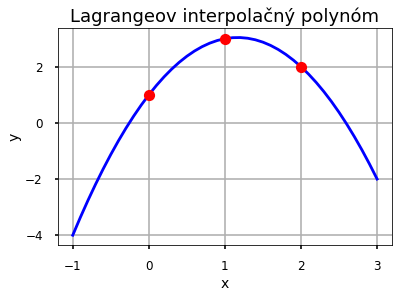

In [97]:
L = l1 + 3*l2 + 2*l3 # Lagrangeov polynom podla (1)

fig = plt.figure(figsize = (6,4))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrangeov interpolačný polynóm', fontsize=18)
plt.grid()
plt.xlabel('x', fontsize=14) 
plt.xticks(fontsize=12)
plt.ylabel('y', fontsize=14) 
plt.yticks(fontsize=12)
plt.show()

**Upozornenie!** Lagrangeove interpolačné polynómy sú definované aj mimo oblasti interpolácie, teda mimo intervalu $[x_0,x_n]$. Mimo tohto intervalu budú ich funkčné hodnoty rásť alebo klesať veľmi rýchlo a neobmedzene. To je nežiadúca vlastnosť, pretože vo všeobecnosti to nezodpovedá správaniu sa procesu, ktorý vygeneroval dáta (t. j. uzly resp. body medzi ktorými sa interpoluje). Preto by sa Lagrangeov polynóm nikdy nemal (bez uváženia) používať na aproximáciu mimo oblasti $[x_0,x_n]$ - na tzv. **_extrapoláciu_** !! 

Lagrangeov interpolačný polynóm je možné skonštruovať i pomocou vstavanej funkcie `lagrange` z balíka *SciPy* z modulu *interpolate*. Ilustruje to nasledujúci kód. 

In [98]:
from scipy.interpolate import lagrange 

In [99]:
f = lagrange(x, y) 

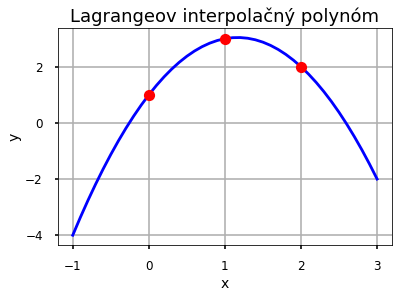

In [100]:
fig = plt.figure(figsize = (6,4))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrangeov interpolačný polynóm', fontsize=18)
plt.grid()
plt.xlabel('x', fontsize=14) 
plt.xticks(fontsize=12)
plt.ylabel('y', fontsize=14) 
plt.yticks(fontsize=12)
plt.show()

--- 

Hoci je interpolačný polynóm jedinečný, existujú rôzne spôsoby jeho reprezentácie, rovnako ako existujú rôzne bázy, ktoré možno použiť na vyjadrenie vektora v $(n + 1)$-rozmernom priestore. V ďalšej časti uvažujeme o reprezentácii interpolačného polynómu v tzv. Newtonovej forme. 

## Newtonov tvar interpolačného polynómu 

Aj keď Lagrangeove polynómy tvoria tzv. *kolokačnú bázu*, užitočnú v teórii pre symbolické odvodenie vzorcov, ako je numerická integrácia, Lagrangeov tvar $(1)$ sa vo všeobecnosti nepoužíva na numerické vyčíslenie interpolačných polynómov. To je preto, že:  

1. Je potrebných veľa operácií na výpočet $p(x)$ pre rôzne hodnoty $x$ (konkrétne je to $O(n^2)$ operácií); 


2. Po pridaní ďalšieho bodu $[x_{n+1},y_{n+1}]$ sa všetky $l_k$ zmenia. 

Tieto problémy sú zmiernené v tzv. **_Newtonovom tvare_** interpolačného polynómu. K jeho popisu potrebujeme nasledovné pojmy. 


--- 

### <font color=red> Definícia 1 (Pomerné diferencie)  </font> 

Nech je daná funkcia $y=f(x)$ resp. $y_i=f(x_i)$. Potom definujeme:

$f[x_i]=y[x_i]=y_i$; 

Výraz $f[x_j,x_{j+1}]=y[x_j,x_{j+1}]=\dfrac{y_{j+1}-y_j}{x_{j+1}-x_j}$ sa nazýva **_prvou pomernou diferenciou_** (resp.pomernou diferenciou prvého rádu); 

Výraz $f[x_j,x_{j+1},\ldots,x_{j+k}]=y[x_j,x_{j+1},\ldots,x_{j+k}]=\dfrac{y[x_{j+1},\ldots,x_{j+k}]-y[x_j,\ldots,x_{j+k-1}]}{x_{j+k}-x_j}$ je **_pomernou diferenciou $k$-teho rádu_** (definovaná iteratívne). 

---

Uvažujme najprv lineárny interpolant prechádzajúci bodmi $[x_0,y_0]$, $[x_1,y_1]$: 

$$p_1(x)=y_0+(x-x_0)y[x_0,x_1],$$ 

keďže $p_1(x)$ má stupeň 1, $p_1(x_0)=y_0$ a 

$$p_1(x_1)=y_0+(x_1-x_0)\dfrac{y_1-y_0}{x_1-x_0}=y_1.$$ 

Ďalej vezmime kvadratický interpolant prechádzajúci bodmi $[x_0,y_0]$, $[x_1,y_1]$, $[x_2,y_2]$: 

$$p_2(x)=p_1(x)+(x-x_0)(x-x_1)y[x_0,x_1,x_2],$$ 

keďže $p_2(x)$ je stupňa 2, $p_2(x_0)=y_0$, $p_2(x_1)=y_1$ a 

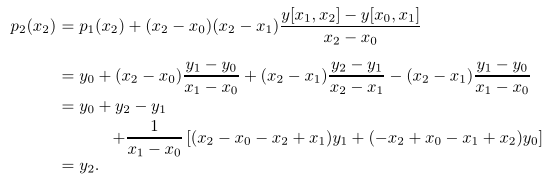 

Pokračovaním a opakovaním naznačeného procesu dostaneme: 

\begin{align*} \label{eq:NewtonInterpPoly} \tag{3} 
p_n(x)= &\, p_{n-1}(x)+(x-x_0)(x-x_1)\ldots(x-x_{n-1})y[x_0,x_1,\ldots,x_n] \\ 
 = &\, y_0+(x-x_0)y[x_0,x_1]+(x-x_0)(x-x_1)y[x_0,x_1,x_2]+\ldots+\left\{\displaystyle\prod\limits_{i=0}^{n-1}(x-x_i)\right\}y[x_0,\ldots,x_n]. 
\end{align*}

Uvedený vzorec sa nazýva **_Newtonova formula pomerných diferencií_** pre interpolačný polynóm prechádzajúci bodmi $\left\{[x_j,y_j]\right\}_{j=0}^n$. Táto forma je efektívna z výpočtového hľadiska lebo pomerné diferencie je možné vcelku rýchlo vypočítať - ako to naznačuje nasledujúca tabuľka, ktorá sa dá ľahko implementovať v počítači ... 

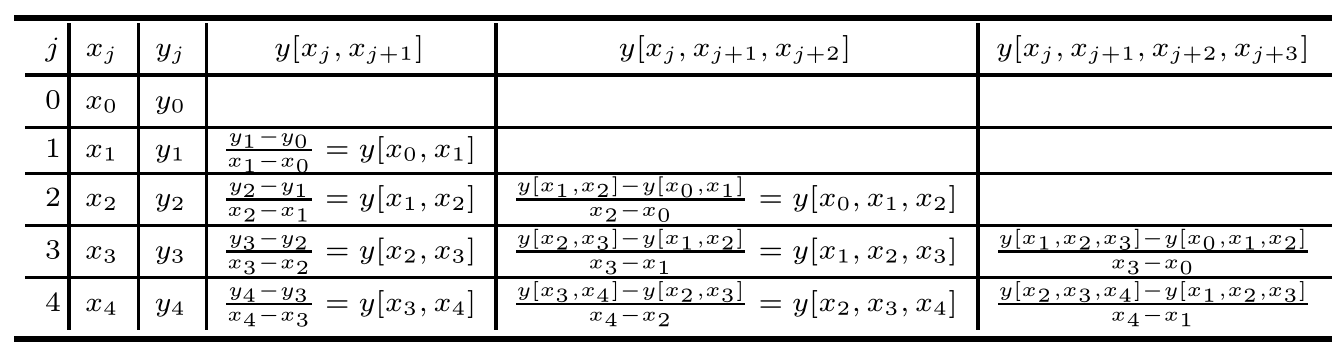 
$$\text{Zdroj: Ackleh et al. (2009).}$$  


--- 

#### <font color=blue> Príklad 4 </font> 

Uvažujme funkciu $y(x)=\displaystyle\int\limits_{-\infty}^{x}\dfrac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}t^2}\,\mathrm{d}t$ (distribučná funkcia štandardizovaného normálneho rozdelenia). 

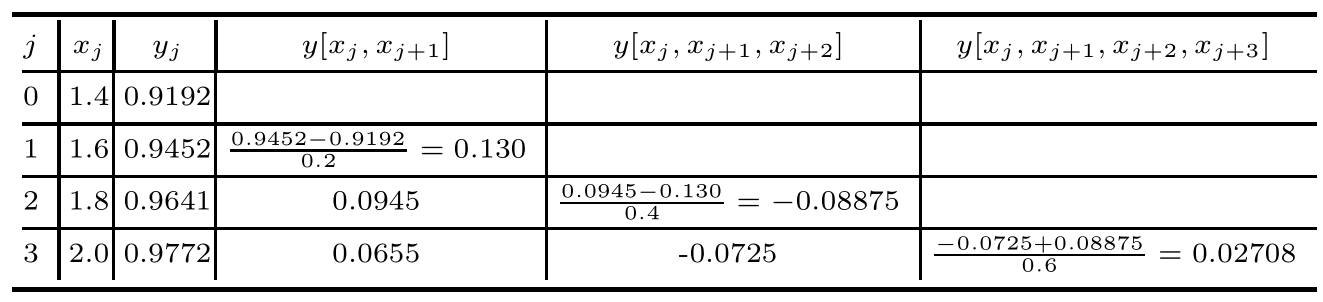
$$\text{Zdroj: Ackleh et al. (2009).}$$ 

Preto 

$$p_1(x)=0.9192+(x-1.4)0.130$$

je (interpolačná) priamka prechádzajúca bodmi $[1.4,0.9192]$, $[1.6,0.9452]$ a zrejme platí $y(1.65)\approx p_1(1.65)\approx 0.9517$. 

Podobne je 

$$p_2(x)= 0.9192+ (x - 1.4)0.130 + (x - 1.4)(x - 1.6)(-0.08875)$$

kvdaratický interpolačný polynóm prechádzajúci bodmi $[x_0,y_0]$, $[x_1,y_1]$, $[x_2,y_2]$ a zrejme platí $y(1.65)\approx p_2(1.65)\approx 0.9506$. 

Nakoniec 

$$p_3(x) = p_2(x) + (x - 1.4)(x - 1.6)(x - 1.8)(0.027083)$$ 

je kubický interpolačný polynóm prechádzajúci všetkými štyrmi bodmi a platí $y(1.65)\approx p_3(1.65)\approx 0.9505$, čo je výsledok s presnosťou na štyri cifry.  

---

---

#### Poznámka 3 

Ak sú body (uzly) rozmiestnené rovnomerne, t. j. ak $x_i=x_0+ih$ pre nejaké $h>0$, potom vzťah $(3)$ je možné zjednodušiť na tvar 

\begin{align*} \label{eq:NewtonFwdForm} \tag{4} 
p_n(x)=f[x_0]+\displaystyle\sum\limits_{k=1}^{n}\binom{s}{k}\Delta^kf(x_0),
\end{align*}

ktorý sa nazýva **_Newtonova formula dopredných diferencií_**, pričom $\Delta$ je *dopredný diferenčný operátor* definovaný vzťahom $\Delta x_k=x_{k+1}-x_k$, nová premenná $s=\dfrac{x-x_0}{h}$ a *rozšírený (zovšeobecnený) binomický koeficient* $\displaystyle\binom{s}{k}$ je daný vzťahom $\displaystyle\binom{s}{k}=\dfrac{s(s-1)(s-2)\ldots(s-k+1)}{k!}$. Keď sa body $x_0,x_1,\ldots,x_n$ preusporiadajú na $x_n,x_{n-1},\ldots,x_0$, vznikne **_Newtonova formula spätných diferencií_**, ktorá má tvar 

\begin{align*} \label{eq:NewtonBackForm} \tag{5} 
p_n(x)=f[x_n]+\displaystyle\sum\limits_{k=1}^{n}(-1)^k\binom{-s}{k}\nabla^kf(x_n),
\end{align*}

kde $s=\dfrac{x-x_n}{h}$ a $\nabla$ je *operátor spätnej diferencie* daný vzťahom $\nabla x_k=x_k-x_{k-1}$.   

---

<font color=purple> EXTRA: Za detailné a správne odvodenie Newtonovej doprednej i spätnej formuly (z Poznámky 3) je možné získať dva bonusové body. </font> 

---

#### <font color=blue> Príklad 5 </font> 

Pomocou Newtonovej formuly dopredných diferencií nájdite interpolačný polynóm $p_3(x)$, ktorý vyhovuje dátam uvedeným v nasledujúcej tabuľke: 

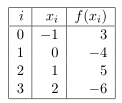 

<ins> Riešenie: </ins> 

Inými slovami, musí platiť:  $p_3(−1) = 3$, $p_3(0) = −4$, $p_3(1) = 5$ a $p_3(2) = −6$. Všimnime si, že interpolačné body (uzly)  $x_0 = −1$, $x_1 = 0$, $x_2 = 1$ a $x_3 = 2$ sú rovnomerne rozmiestnené resp. sú medzi nimi rovnaké vzdialenosti (ekvidištantné body), konkrétne ide o krok veľkosti $h=1$, tzn., že o toľko sa líšia každé dva za sebou nasledujúce uzly. Položíme $s=\dfrac{x-x_0}{h}=x+1$ a počítame: 

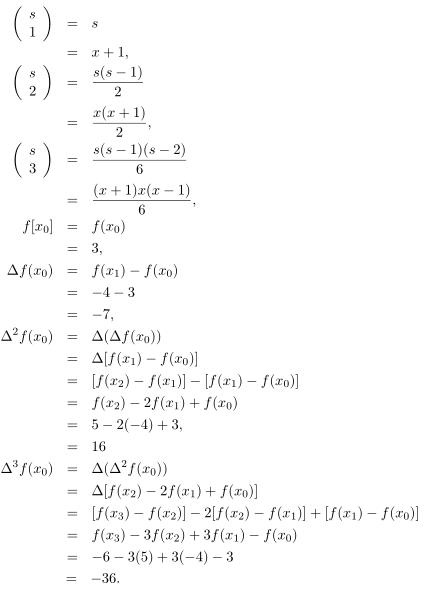 

Spolu teda dostávame 

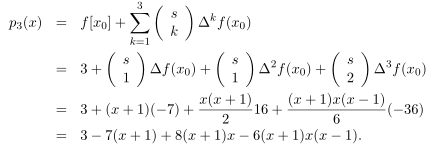

---

<font color=orange> Urobte analogický výpočet i vizualizáciu ako v Príklade 5 ale pomocou Newtonovej formuly spätných diferencií a porovnajte výsledný interpolačný polynóm s tým, ktorý vznikol v Príklade 5 a tiež s Newtonovou formulou pomerných diferencií. </font> 

---

#### Poznámka 4 

Funkcie $N_k(x)=\displaystyle\prod\limits_{i=0}^{k}(x-x_i)$, $k=1,\ldots,n$ tvoria bázu priestoru polynómov stupňa $n$. Na rozdiel od Lagrangeovej bázy, táto báza spolu s podmienkami $\left\{p(x_i)=y_i\right\}_{i=0}^{n}$ vedie k systému lineárnych rovníc, ktorého matica je dolná trojuholníková matica (nie matica identity ako pri Lagrangeovi). 

---

---

#### Poznámka 5 

Vidíme, že jedna krása metódy spočíva v tom, že po určení koeficientov, pridanie nových dátových bodov (resp. uzlov) nezmení vypočítané koefcienty, potrebujeme len vypočítať pomerné diferencie vyššieho rádu rovnakým spôsobom. Celý **postup výpočtu týchto koeficientov možno zhrnúť do tabuľky pomerných diferencií**. Pozrime sa na príklad s použitím 5 dátových bodov (resp. uzlov): 

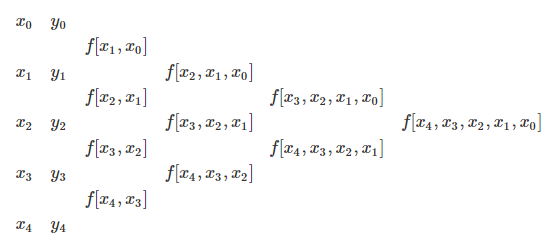 

Každý prvok v tabuľke možno vypočítať pomocou dvoch predchádzajúcich prvkov (vľavo). V skutočnosti môžeme vypočítať každý prvok a uložiť ho do trojuholníkovej matice, to znamená, že maticu koeficientov možno zapísať ako:

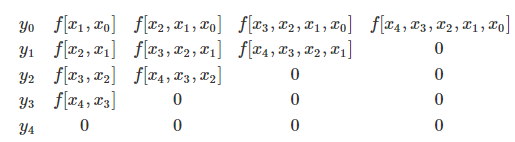 

Všimnime si, že prvý riadok predchádzajúcej matice sú vlastne všetky koeficienty, ktoré potrebujeme (v nasledujúcom príklade)  :-) 

---

---

#### <font color=blue> Príklad 6 </font> 

Vypočítame pomerné diferencie pre nasledujúce body $[-5,-2],[-1,6],[0,1],[2,3]$. Ďalej skonštruujeme interpolačný polynóm podľa Newtonovho vzorca pomerných diferencií a znázornime ho. 


In [108]:
def divided_diff(x, y):
    '''
    funkcia pre vypocet tabulky pomernych diferencii 
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # prvy stlpec je y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    vypocet interpolacneho poynomu v bode x podla Newtonovho vzorca (pomernych diferencii)
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

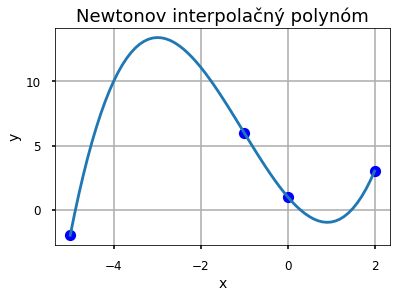

In [112]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# koeficienty pomernych diferencii 
a_s = divided_diff(x, y)[0, :]

# vypocet na novych datach 
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (6, 4)) 
plt.title('Newtonov interpolačný polynóm', fontsize=18)
plt.grid()
plt.xlabel('x', fontsize=14) 
plt.xticks(fontsize=12)
plt.ylabel('y', fontsize=14) 
plt.yticks(fontsize=12)
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new);

---

#### Poznámka 6  

Z Lagrangeovho interpolačného polynómu je možné dostať efektívnejší vzorec pre interpoláciu - ide o tzv. **_Barycentrickú  interpolačnú formulu_** 

$$P_n(x)=\dfrac{\displaystyle\sum\limits_{i=0}^{n}\dfrac{w_i}{x-x_i}y_i}{\displaystyle\sum\limits_{i=0}^{n}\dfrac{w_i}{x-x_i}}, \quad x\neq x_i,\quad i=0,1,\ldots,n,$$

kde $w_i=\dfrac{1}{\displaystyle\prod_{j=0 \\ j\neq i}^{n}(x_i-x_j)}$, $i=0,1,\ldots n$.

Tento vzorec je výpočtovo efektívny z nasledujúceho dôvodu: Výpočet koeficientov $w_i$, $i=0,1,\ldots,n$ vyžaduje $O\left(n^2\right)$ operácií. Výpočet funkčnej hodnoty $P_n(x)$ spotrebuje rádovo $O(n)$ operácií. Pridanie ďalšieho uzla $x_{n+1}$ znamená prepočet koeficientov $w_i$, $i=0,1,\ldots,n$, čo si vyžiada už iba $O(n)$ operácií. 

---

<font color=purple> EXTRA: Za korektné odvodenie Barycentrickej formuly je možné získať 2 bonusové body. Trik spočíva vo vhodnom prepísaní Lagrangeovych bázických funkcií so zakomponovaním váh $w_i$ a v uvedomení si, že interpolačný polynóm interpoluje funkciu $f(x)=1$ presne. </font>

## Chyba interpolačného polynómu 

V tejto časti preskúmame chybu aproximácie funkcie $f(x)$ pomocou interpolačného polynómu $p(x)$, ktorý prechádza $n+1$ bodmi $[x_j,f(x_j)]$, $j=0,1,2,\ldots,n$. 

--- 

### <font color=green> Veta 3  </font> 

Ak $x_0,x_1,\ldots,x_n$ je $n+1$ rôznych bodov z intervalu $\langle a,b \rangle$ a $f\in C^{n+1}\langle a,b \rangle$, potom pre každé $x\in\langle a,b \rangle$ existuje číslo $\xi=\xi(x)\in(a,b)$ také, že platí 

\begin{align*} \label{eq:InterpPolyErr} \tag{6} 
f(x)=p(x)+\dfrac{f^{(n+1)}\left(\xi(x)\right)\displaystyle\prod\limits_{j=0}^{n}(x-x_j)}{(n+1)!}.
\end{align*}

--- 

Ďalej si ukážeme inú bázu pre množinu polynómov stupňa $n$, vďaka ktorej je možné chybu $(7)$ zredukovať. 

## Optimálne body interpolácie: Čebyševove uzly

Uvažujme odhad chyby aproximácie daný vzťahom $(6)$. Máme 

\begin{align*} \label{eq:ChebInterpPolyErr} \tag{7} 
\parallel f-p \parallel_{\infty}=\underset{a\le x \le b}{\max}\left|f(x)-p(x)\right|\le\dfrac{1}{(n+1)!}\parallel f^{(n+1)}\parallel_{\infty}\parallel W \parallel_{\infty},
\end{align*}

kde $W(x)=\displaystyle\prod\limits_{j=0}^{n}(x-x_j)$. 

Vidíme, že hranica chyby závisí od uzlov $\{x_j\}_{j=0}^{n}$ prostredníctvom $\parallel W \parallel_{\infty}$. Prirodzene sa natíska otázka, či je možné vybrať uzly $\{x_i\}_{i=0}^{n}$ tak, aby sme minimalizovali $\parallel W \parallel_{\infty}$ ? Ukážeme si, že v tomto smere je možné predsa len čosi urobiť. Najprv sa obmedzíme na interval $\langle a,b \rangle = \langle -1,1 \rangle$ a následne naše úvahy rozšírime na ľubovoľný interval.  


--- 

### <font color=green> Veta 4  </font> 

Norma $\parallel W \parallel_{\infty}$, kde $W=\displaystyle\prod\limits_{i=0}^{n}(x-x_i)$, je minimalizovaná na intervale $\langle -1,1 \rangle$ pre $x_i=\cos\left(\dfrac{2i+1}{n+1}\cdot\dfrac{\pi}{2}\right)$, $0\le i \le n$ a hodnota minima je $\parallel W \parallel_{\infty}=2^{-n}$. 

--- 

---

#### Poznámka 7 

Ak interval, na ktorom potrebujeme aproximovať nejakú funkciu $f$ je v tvare $\langle a,b \rangle$ miesto $\langle -1,1 \rangle$, tak sa použije transformácia 

$$x=\dfrac{a-2y+b}{a-b}, \quad y\in \langle a,b \rangle$$

ktorá zobrazí $\langle a,b \rangle$ do $\langle -1,1 \rangle$. Následne sa aproximuje funkcia 

$$g(x)=f\left(\frac{1}{2}(b-a)x+\frac{1}{2}(a+b)\right)$$ 

pre $-1\le x \le 1$. Tým pádom odpovedajúce "optimálne" interpolačné body (uzly) v intervale $\langle a,b \rangle$ sú v tvare 

$$y_i=\frac{1}{2}\left[(b-a)x_i+(a+b)\right], \quad 0\le i \le n,$$ 

kde $x_i$ sú dané Vetou 4. 

V tomto prípade je možné dokázať, že $\parallel W \parallel_{\infty}=2^{-2n-1}(b-a)^{n+1}$. 

---

---

#### Poznámka 8 

Aplikáciou Vety 3 a Vety 4 spolu s koreňmi [Chebysevovych polynómov](https://brilliant.org/wiki/chebyshev-polynomials-definition-and-properties/) v úlohe interpolačných uzlov dostaneme 

\begin{align*} \label{eq:ChebysevErrBound} \tag{8} 
\parallel f-p \parallel_{\infty} \le \dfrac{1}{(n+1)!}\parallel f^{(n+1)} \parallel_{\infty}(b-a)^{n+1}2^{-2n-1}.
\end{align*}

Porovnanie s všeobecnou hranicou chyby: pre ľubovoľnú množinu rozličných uzlov máme $\parallel W \parallel_{\infty}\le (b-a)^{n+1}$, takže vždy platí 

$$\parallel f-p \parallel_{\infty} \le \dfrac{1}{(n+1)!}\parallel f^{(n+1)} \parallel_{\infty}(b-a)^{n+1}.$$

---

---

#### <font color=blue> Príklad 7 </font>  

Nasledujúce 4 grafy A, B, C, D ilustrujú zaujímavý jav. V každom z prípadov ide o interpoláciu funkcie $f(x)=\dfrac{1}{1+x^2}$ na intervale $\langle -5,5 \rangle$, čo je funkcia rovnakého typu ako tzv. *Rungeho funkcia* $y = \dfrac{1}{1+25x^2}$. Vo všetkých prípadoch je použitý Lagrangeov interpolačný polynóm. Rozdiel je v počte uzlov a tiež v type uzlov. Konkrétne grafy A, B zobrazujú situáciu, keď je počet uzlov $N=13$. Všimnime si, že pri ekvidištantných uzloch (graf A) dochádza v blízkosti krajných bodov intervalu k výrazným odchýlkam interpolantu resp. k určitým osciláciám. Naproti tomu, voľbou Chebysevovych uzlov (graf B) sa dosiahla presnejšia aproximácia aj v blízkosti krajných bodov intervalu (všimnite si ako sú tam uzly zhustené). Grafy C, D znázorňujú situáciu, keď je počet uzlov $N=20$ (teda interpolačný polynóm je vyššieho stupňa ako v predošlom prípade). Všimnite si, ako sa v prípade ekvidištantných uzlov nepresnosti resp. oscilácie zväčšili. Na druhej strane, pre Chebysevove uzly sme naopak dostali presnejšiu aproximáciu. Popísaný jav - teda rastúce oscilácie v blízkosti krajných bodov intervalu  polynomického interpolantu s ekvidištantnými uzlami, pri rastúcom počte uzlov (resp. s rastúcim stupňom polynómu) sa nazýva **_Rungeho jav_**. Ako to ilustrujú grafy B, D, jedným z riešení môže byť použitie neekvidištantných uzlov (napr. Chebysevovych). Iné riešenia predstavíme neskôr.  

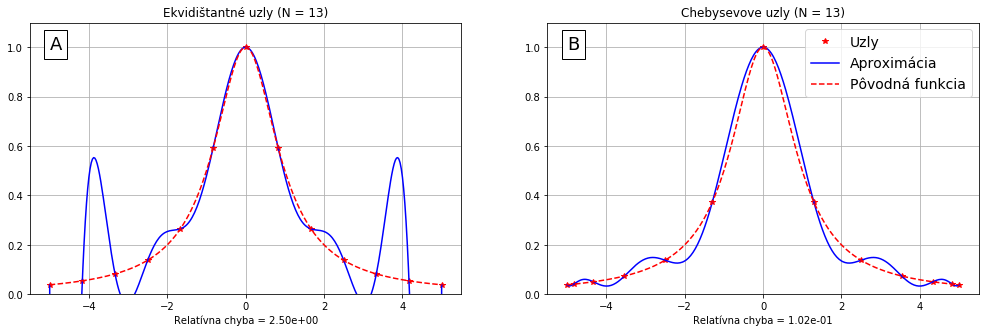

In [49]:
import matplotlib.pylab as plb 
from scipy.interpolate import lagrange 

# Choice of function to be interpolated
f = lambda x : 1./(x**2 + 1) 

N = 13    # Number of nodes
x_train = np.linspace(-5,5,N);  # Equispaced samples
x_test  = np.linspace(-5,5,331); # Grid points
y_train = f(x_train)    # Function values at samples
y_true = f(x_test)  # Function values at grid points 

# Chebyshev points and function values
def ChebyL(n):
    #compute the set of n Chebyshev-Lobatto points in [-1,1]
    return -np.cos(np.pi*np.arange(0.,n)/(n-1))

x_CL  = ChebyL(N)*5
y_CL = f(x_CL) 

# Interpolation 
f_poly = lagrange(x_train,y_train)
f_Cheb = lagrange(x_CL, y_CL)

y_test_poly = f_poly(x_test)
y_test_Cheb = f_Cheb(x_test)

# Relative errors
err1 = np.linalg.norm(y_true-y_test_poly,2)/np.linalg.norm(y_true,2)
err2 = np.linalg.norm(y_true-y_test_Cheb,2)/np.linalg.norm(y_true,2) 

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,5))
ax1.cla(); ax2.cla()
ax1.plot(x_train, y_train,'r*', x_test, y_test_poly,'b-',x_test,y_true,'r--')
ax1.set_title("Ekvidištantné uzly (N = 13)"); 
ax1.set_xlabel("Relatívna chyba = %.2e"%err1)
ax2.plot(x_CL, y_CL,'r*', x_test, y_test_Cheb,'b-',x_test,y_true,'r--')
ax2.set_title("Chebysevove uzly (N = 13)")
ax2.set_xlabel("Relatívna chyba = %.2e"%err2)
ax2.legend(["Uzly","Aproximácia","Pôvodná funkcia"],loc = 'best', fontsize = 14)
bb = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(-5.,.99,"A",bbox = bb, fontsize=18)
ax2.text(-5.,.99,"B",bbox = bb, fontsize=18)
ax1.set_ylim((-.1, 1.1)); ax2.set_ylim((-.1, 1.1)); 
ax1.set_ylim((0, 1.1)); ax2.set_ylim((0, 1.1));          
ax1.grid(True); ax2.grid(True); 
fig.show()

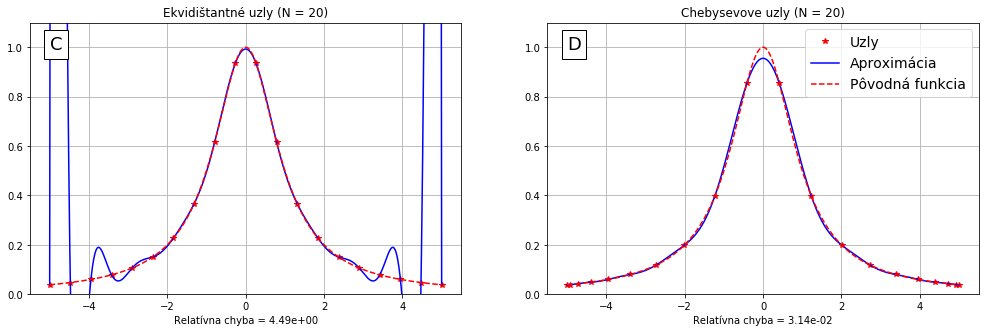

In [50]:
import matplotlib.pylab as plb 
from scipy.interpolate import lagrange 

# Choice of function to be interpolated
f = lambda x : 1./(x**2 + 1) 

N = 20    # Number of nodes
x_train = np.linspace(-5,5,N);  # Equispaced samples
x_test  = np.linspace(-5,5,331); # Grid points
y_train = f(x_train)    # Function values at samples
y_true = f(x_test)  # Function values at grid points 

# Chebyshev points and function values
def ChebyL(n):
    #compute the set of n Chebyshev-Lobatto points in [-1,1]
    return -np.cos(np.pi*np.arange(0.,n)/(n-1))

x_CL  = ChebyL(N)*5
y_CL = f(x_CL) 

# Interpolation 
f_poly = lagrange(x_train,y_train)
f_Cheb = lagrange(x_CL, y_CL)

y_test_poly = f_poly(x_test)
y_test_Cheb = f_Cheb(x_test)

# Relative errors
err1 = np.linalg.norm(y_true-y_test_poly,2)/np.linalg.norm(y_true,2)
err2 = np.linalg.norm(y_true-y_test_Cheb,2)/np.linalg.norm(y_true,2) 

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,5))
ax1.cla(); ax2.cla()
ax1.plot(x_train, y_train,'r*', x_test, y_test_poly,'b-',x_test,y_true,'r--')
ax1.set_title("Ekvidištantné uzly (N = 20)"); 
ax1.set_xlabel("Relatívna chyba = %.2e"%err1)
ax2.plot(x_CL, y_CL,'r*', x_test, y_test_Cheb,'b-',x_test,y_true,'r--')
ax2.set_title("Chebysevove uzly (N = 20)")
ax2.set_xlabel("Relatívna chyba = %.2e"%err2)
ax2.legend(["Uzly","Aproximácia","Pôvodná funkcia"],loc = 'best', fontsize = 14)
bb = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(-5.,.99,"C",bbox = bb, fontsize=18)
ax2.text(-5.,.99,"D",bbox = bb, fontsize=18)
ax1.set_ylim((-.1, 1.1)); ax2.set_ylim((-.1, 1.1)); 
ax1.set_ylim((0, 1.1)); ax2.set_ylim((0, 1.1));          
ax1.grid(True); ax2.grid(True); 
fig.show()

--- 

---

#### Poznámka 9 

Vezmime fixovaný interval $\langle a,b \rangle$ a nech $n\to\infty$. Intuitívne by sme očakávali, že $\parallel f-p_n \parallel_{\infty}\to0$, pričom $p_n$ je interpolačný polynóm stupňa $n$. Táto úvaha ale vo všeobecnosti neplatí. Napr. uvažujme tzv. funkciu *Rungeho typu* danú predpisom: 

$$f(x)=\dfrac{1}{1+x^2}\in C^{\infty}\langle -5,5 \rangle.$$

Ak použijeme ekvidištantné uzly v intervale $\langle -5,5 \rangle$, potom sa dá ukázať, že $\parallel f-p_n \parallel_{\infty}\to\infty$ pre $n\to\infty$ (problematické je správanie zložky $\displaystyle\prod\limits_{j=0}^{n}(x-x_j)$ v chybovom člene aproximácie). Z uvedeného ako aj z Príkladu 7 vyplýva, že **interpolácia polynómami vysokého stupňa nemusí byť vhodná** a môže byť značne nepresná. Avšak, pokiaľ sú uzly Chebysevove body (dané Vetou 4; znázornené nižšie na nasledujúcom obrázku) a $f\in C^2\langle-1,1,\rangle$, potom $\parallel f-p_n \parallel_{\infty}\to0$ pre $n\to\infty$ (v skutočnosti $\parallel f-p_n \parallel_{\infty}=\mathcal{O}\left(1/\sqrt{n}\right)$, keď $n\to\infty$). <br/>
Napriek tomu, vo všeobecnosti je možné dokázať, nezávisle od toho aké sú interpolačné uzly, že existuje $f\in C\langle-1,1,\rangle$ taká, pre ktorú platí $\parallel f-p_n \parallel_{\infty}\to\infty$ ak $n\to\infty$. 

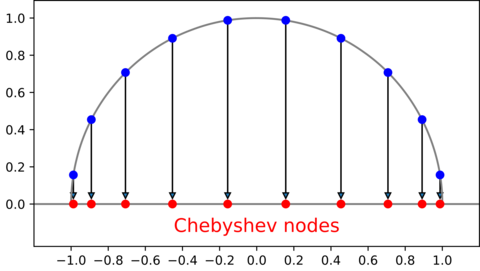 
$$\text{Zdroj: https://en.wikipedia.org/wiki/Chebyshev_nodes. }$$ 
$$\text{(Čebyševove uzly sú ekvivalentné $x$-ovym súradniciam rovnako vzdialených bodov na jednotkovej polkružnici.)}$$

---

Poznámka 9 spolu s Príkladom 7 nás motivujú uvažovať o iných metódach aproximácie funkcií pomocou polynómov - napr. po častiach polynomická  interpolácia (*splajny*). Existujú samozrejme aj iné prístupy k interpolácií, napr. také, v ktorých špecifikujeme nie len funkčné hodnoty, ale i hodnoty derivácií v zadaných bodoch. Jednoduchá schéma tohto prístupu je *Hermitova interpolácia*. 

***
<a id=splajny></a>
 # <font color=brown> Aproximácia po častiach polynomickými funkciami (splajny) </font>

Ak potrebujeme interpolovať nejakú funkciu $f$ na dlhšom intervale $\langle a,b \rangle$, musíme žiadať splnenie interpolačných podmienok v dostatočne veľkom počte bodov. Pokiaľ by bol interpolant polynóm, tak musí byť vysokého stupňa a to veľakrát vedie k značným chybám medzi (rovnomernými) uzlami (viď Poznámka 9 a Príklad 7). Tadiaľ cesta nevedie. Ako rozumnejší prístup sa javí rozdeliť interval $\langle a,b \rangle$ na menšie podintervaly, t. j. $a=x_0<x_1<\ldots<x_{n-1}<x_n=b$ a na každom z nich zostrojiť interpolačný polynóm nižšieho stupňa. Takto vznikne *po častiach polynomická funkcia*.   

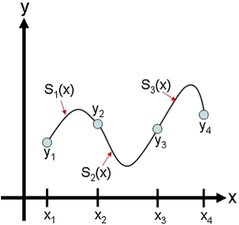 
$$\text{Zdroj: Kong et al. (2020).}$$

Po častiach polynomické funkcie sú často využívané interpolanty. Ľahko sa s nimi pracuje, môžu poskytnúť dobré aproximácie, a preto sa využívajú okrem iného i v počítačovej grafike či v metódach konečných prvkov. Jednoduchým typom aproximácie uvedeného typu je aproximácia pomocou úsečky (resp. lineárnym polynómom, t.j. polynómom stupňa 1) na každom pointervale $\langle x_i, x_{i+1}\rangle$, $i=0,1,\ldots,n-1$. 

## Po častiach lineárna interpolácia (lineárne splajny)

--- 

### <font color=red> Definícia 2 </font> 

Je dané delenie $\Delta$ intervalu $\langle a,b \rangle$ v tvare 

$$\Delta: a=x_0<x_1<\ldots<x_{n-1}<x_N=b.$$ 

Symbolom $L_{\Delta}$ budeme označovať množinu všetkých **_po častiach lineárnych funkcií_** na intervale $\langle a,b \rangle$ vzhľadom na delenie $\Delta$ a táto množina je daná nasledovne: 

$$L_{\Delta}=\left\{\varphi(x)\in C\langle a,b, \rangle:\,\varphi(x) \text{ je lineárna funkcia na každom podintervale } \langle x_i,x_{i+1}\rangle, \,0\le i \le N-1 \text{ delenia } \Delta \right\}.$$ 

---

Nasledujúci obrázok ilustruje príklad po častiach lineárnej funkcie $\varphi\in L_{\Delta}$. 

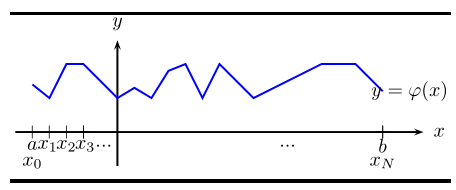 
$$\text{Zdroj: Ackleh et al. (2009).}$$ 

**Aj Príklad 1 ilustruje po častiach lineárnu interpoláciu**, ak berieme do úvahy všetky tri zadané uzly (viď obrázok v Príklade 1). 


--- 

#### <font color=green> Tvrdenie 1 </font> 

$L_{\Delta}$ tvorí $(N+1)$-rozmerný podpriestor priestoru $C\langle a,b \rangle$. 

---

--- 

#### <font color=green> Tvrdenie 2 </font> 

Je daná funkcia $f\in C\langle a,b \rangle$. Potom k nej existuje jediná funkcia $\Phi\in L_{\Delta}$, ktorá spĺňa $f(x_i)=\Phi(x_i)$, $0\le i \le N$. 

---

--- 

### <font color=red> Definícia 3 </font> 

Je daná množina bodov $\{[x_i,f(x_i)],\,i=0,1,\ldots,N\}$, kde $f(x_i)$ sú známe funkčné hodnoty nejakej (spojitej) funkcie $f$ v uzloch $x_i$. 
Funkcia $\Phi(x)=\displaystyle\sum\limits_{j=0}^{N}f(x_j)\varphi_j(x)$, kde $\varphi_j(x)$ sú bázické funkcie (*hat functions*; zavedené v dôkaze Tvrdenia 1) sa nazýva **_po častiach lineárny interpolant_** funkcie $f$ resp. $L_{\Delta}$- interpolant a označujeme to $\Phi(x)=I_Nf(x)$.  

---

---

#### Poznámka 10

$I_N:\,C\langle a,b \rangle \rightarrow L_{\Delta}$ je lineárny operátor, t. j. spĺňa 

$$I_N\left(af_1(x)+bf_2(x)\right)=aI_Nf_1(x)+bI_Nf_2(x).$$

--- 

Ďalej budeme chcieť **odhadnúť chybu spôsobenú po častiach lineárnou interpoláciou** funkcie $f$ na intervale $\langle a,b \rangle$, tzn. odhadnúť 

$$\parallel f-I_Nf \parallel_{\infty}=\underset{x\in\langle a,b \rangle}{\max} \left| f(x) - I_Nf(x) \right|.$$ 

Za týmto účelom zavedieme nasledovné označenia: $h=\underset{0\le i \le N-1}{\max}(x_{i+1}-x_i)$; $D^{n}f(x)=f^{(n)}(x).$ 

O odhade chyby vzniknutej po častiach lineárnym interpolantom na intervale $\langle a,b \rangle$ pojednáva ďalšia veta. 

--- 

### <font color=green> Veta 5  </font> 

Nech $f\in C^2\langle a,b \rangle$. Potom $\parallel f-I_Nf \parallel_{\infty}\le\dfrac{1}{8}h^2\parallel D^2f\parallel_{\infty}$. 

---

---

#### Poznámka 11 

* Pre $f\in C^2\langle a,b \rangle$ je tiež možné dokázať, že 

$$\parallel D(f-I_Nf) \parallel_{\infty}\le\dfrac{1}{2}h\parallel D^2f \parallel_{\infty}.$$ 


* Pre $f\in C^1\langle a,b \rangle$ je možné dokázať, že 

$$\parallel f-I_Nf \parallel_{\infty}\le\dfrac{1}{2}h\parallel Df \parallel_{\infty}.$$ 


* Pre $f\in C\langle a,b \rangle$ sa ľahko ukáže 

$$\parallel f-I_Nf \parallel_{\infty}\to0,\,\text{ ak } h\to0.$$

---

<font color=orange> Zdôvodnite posledný bod z Poznámky 11. </font>

---

#### <font color=blue> Príklad 8 </font> 

Vezmime funkciu $f(x)=\ln x$ na intervale $\langle 2,4 \rangle$. Chceme nájsť také $h$, aby platilo, že chyba aproximácie funkcie $f$ na intervale $\langle 2,4 \rangle$ po častiach lineárnym interpolantom nebude väčšia ako $10^{-4}$. Nech $|x_{i+1}-x_i|=h$ pre $0\le i \le N$. Potom máme 

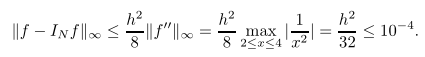 

Preto $h^2\le32\times10^{-4}$, $h\le 0.056$, čo dáva $N=(4-2)/h\ge36$. 

---

Aj keď bázické funkcie (*hat functions*) zavedené v dôkaze Tvrdenia 1 sú často využívané v praxi, v niektorých aplikáciách (napr. v počítačovej grafike) je žiadúce, aby dosahoval interpolant vyšší stupeň hladkosti (tzn. aby bol z triedy funkcií $C^1$, $C^2$ alebo z vyššej) na mriežke bodov $x_i$ z delenia $\Delta$. Na tento účel sa zvyknú používať špeciálne po častiach kubické polynómické funkcie - tzv. *kubické splajny*, ktoré si predstavíme v nasledujúcej časti. 

## Po častiach kubická interpolácia (kubické splajny) 

Po častiach polynomická interpolácia umožňuje konštruovať veľmi presné aproximácie, ale nie vždy vytvára aproximácie, ktoré sú príjemné pre oči (vizuálne príťažlivé či realistické napr. z hľadiska počítačovej grafiky), a to je v niektorých aplikáciách skutočne problém. K tomu dochádza, pretože aproximačná funkcia nie je hladká na spojoch (v uzloch) medzi jednotlivými časťami  po častiach polynomickej aproximácie. Hoci po častiach polynomický interpolant je spojitý, nie je však spojite diferencovateľný na celom intervale aproximácie. Teda graf interpolantu môže obsahovať „lomy“ resp. "ostré hroty" (viď obrázok pod Definíciou 2). *Splajnové krivky* riešia tento problém. Základnou myšlienkou je skonštruovať po častiach polynomickú aproximáciu, ktorá nielen interpoluje dané údaje alebo funkčné hodnoty, ale ktorá je tiež „hladká“, čo znamená, že je do určitého stupňa spojite  diferencovateľná. 

**_Splajnom_** budeme vo všeobecnosti rozumieť po častiach polynomickú funkciu stupňa $k$, ktorá je $(k-1)$-krát spojite diferencovateľná.   

--- 

### <font color=red> Definícia 4 </font> 

Množina **_kubických splajnov_** na intervale $\langle a,b \rangle$ vzhľadom k jeho deleniu $\Delta$ je definovaná nasledovne: 

$$S_{\Delta}=\left\{\varphi(x)\in C^2\langle a,b \rangle:\,\varphi(x) \text{ je kubický polynóm na každom podindervale  } [x_j,x_{j+1}],\,0\le j \le N-1 \text{ delenia } \Delta \right\}.$$

---

Nasledujúci obrázok názorne ilustruje interpoláciu kubickým splajnom. Ide teda o funkciu, ktorá je po častiach kubický polynóm, tzn. že každá dvojica bodov $[x_j,y_j]$, $[x_{j+1},y_{j+1}]$ je spojená nejakým kubickým polynómom $S_j(x)$ (t.j. polynóm stupňa 3). Pozor! $S_j(x)$ na obrázku nižšie nemusí byť to isté, čo $s_j(x)$ v $(9)$ ! 

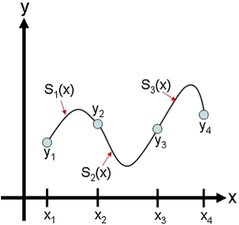 
$$\text{Zdroj: Kong et al. (2020).}$$

---

#### Poznámka 12 

* Keďže funkcie $\varphi(x)\in S_{\Delta}$ patria do triedy $C^2\langle a,b \rangle$, tak tieto funkcie majú vyšší stupeň hladkosti, konkrétne majú spojité derivácie až do druhého rádu a to v každom bode intervalu $\langle a,b \rangle$, vrátane bodov mriežky t. j. vrátane bodov delenia intervalu $\langle a,b \rangle$. Jednotlivé kubické polynómy, z ktorých (kubická)   splajnová krivka pozostáva sa vďaka hladkosti (existencii vyšších derivácii) "napájajú hladko" resp. nevznikajú "ostré hroty" v uzloch ako napr. pri po častiach lineárnej aproximácii (viď obrázok vyššie - pod Definíciou 2). 


* Splajny sú špeciálnou triedou po častiach polynomických funkcií. 

---

Najprv zavedieme bázu pre $S_{\Delta}$. Pre jednoduchosť budeme uvažovať rovnomernú mriežku bodov resp. také delenie intervalu $\langle a,b \rangle$, kde $x_{j+1}-x_j=h$ pre každé $j$ a položíme 

\begin{align*} \label{eq:CubicSplineBasis} \tag{9} 
s_j(x)=\begin{cases}
0, \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad x>x_{j+2}, \\ 
 \\ 
\dfrac{1}{6h^3}(x_{j+2}-x)^3, \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad x_{j+1}\le x \le x_{j+2}, \\ 
 \\
\dfrac{1}{6}+\dfrac{1}{2h}(x_{j+1}-x)+\dfrac{1}{2h^2}(x_{j+1}-x)^2-\dfrac{1}{2h^3}(x_{j+1}-x)^3, \qquad x_j\le x \le x_{j+1}, \\ 
 \\ 
\dfrac{2}{3}-\dfrac{1}{h^2}(x-x_j)^2-\dfrac{1}{2h^3}(x-x_j)^3, \qquad\qquad\qquad\qquad\qquad x_{j-1}\le x \le x_j, \\ 
 \\ 
\dfrac{1}{6h^3}(x-x_{j-2})^3, \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad x_{j-2}\le x \le x_{j-1}, \\ 
 \\ 
0, \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad x<x_{j-2}. 
\end{cases}
\end{align*}

--- 

### <font color=red> Definícia 5 </font> 

Funkcia definovaná vzťahom $(9)$ sa nazýva (kubický) **_B-splajn_** centrovaný v bode $x=x_j$ vzhľadom k deleniu $\Delta$ s rovnomernou mriežkou deliacich bodov. 

---

---

#### Poznámka 13

Priamočiaro je možné dokázať, že $s'_j(x)$ a $s''_j(x)$ sú spojité funkcie a teda $s_j(x)\in S_{\Delta}$.  

---

<font color=purple> EXTRA: Dokážte tvrdenie v Poznámke 15. Za správne zdôvodnenie môžete získať jeden bonusový bod.</font>

Vezmime do úvahy ešte ďasie dva extra body mriežky, konkrétne $x_{-1}=x_0-h$, $x_{N+1}=x_N+h$ a uvažujme B-splajny $s_{-1}(x)$ a $s_{N+1}(x)$ centrované v bodoch $x_{-1}$ a $x_{N+1}$. 

Pre $-1\le j \le N+1$ dodefinujme 

\begin{align*} \label{eq:CubicSplineBasis2} \tag{10} 
\varphi_j(x)=\begin{cases} 
0, \qquad\qquad x<a, \\ 
s_j(x), \qquad a\le x \le b, \\ 
0, \qquad\qquad x>b.
\end{cases}
\end{align*}

Tieto bázické funkcie $\varphi_j(x)$ (B-splajny) sú znázornené na nasledujúcom obrázku. 

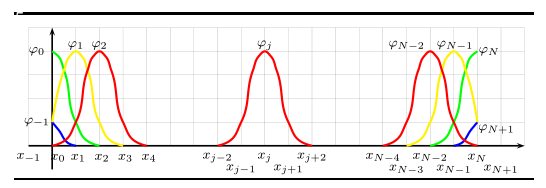 
$$\text{Zdroj: Ackleh et al. (2009).}$$ 


<font color=orange> Na vhodnom intervale (s príslušným delením) vykreslite niekoľko (aspoň 4) B-splajnov (definovaných v $(9)$). Vykreslite tiež niekoľko (aspoň tri) ich lineárnych kombinácií. </font> 

--- 

### <font color=green> Veta 6  </font> 

Funkcie $\left\{\varphi_j(x)\right\}_{j=-1}^{N+1}$ (zavedené v $(9)$ resp. $(10)$) tvoria bázu pre $S_{\Delta}$ (preto pomenovanie B-splajny - bázické splajny). 

---

Bežne sa využívajú dva typy kubických splajnov: *ukotvené kubické splajny* (ang.- *clamped cubic splines*) a *prirodzené kubické splajny* (ang. *natural cubic splines*). 

--- 

### <font color=red> Definícia 6 </font> 

**_Ukotvený splajnový interpolant_** $\Phi_c \in S_{\Delta}$ funkcie $f\in C^1\langle a,b \rangle$ spĺňa tieto podmienky 

$$(c)\begin{cases}
\Phi_c(x_i) = f(x_i), \quad i=0,1,\ldots,N, \\ 
\\ 
\Phi_c'(x_0) = f'(x_0), \\ 
\\
\Phi_c'(x_N) = f'(x_N). 
\end{cases}$$

---

--- 

### <font color=red> Definícia 7 </font> 

**_Prirodzený splajnový interpolant_** $\Phi_n \in S_{\Delta}$ funkcie $f\in C\langle a,b \rangle$ spĺňa tieto podmienky 

$$(n)\begin{cases}
\Phi_n(x_i) = f(x_i), \quad i=0,1,\ldots,N, \\ 
\\ 
\Phi_n''(x_0) = 0, \\ 
\\
\Phi_n''(x_N) = 0. 
\end{cases}$$

---

--- 

#### <font color=green> Tvrdenie 3 </font> 

Nech $f\in C^1\langle a,b \rangle$. Potom existuje jediný ukotvený splajnový interpolant $\Phi_c$ a tiež jediný prirodzený splajnový interpolant $\Phi_n$ funkcie $f$. (Uvažujeme tu rovnomernú mriežku bodov resp. delenie intervalu $\langle a,b \rangle$.)

---

Ďalšia veta hovorí o chybe aproximácie funkcie $f$ pomocou ukotveného kubického splajnového interpolantu, pričom podobný výsledok je možné dokázať aj pre prirodzený kubický splajnový interpolant. Veta 7 je sformulovaná pre ekvidištantné body, no podobný výsledok platí aj pre nerovnomernú mriežku bodov.  

--- 

### <font color=green> Veta 7 </font> 

Predpokladajme, že $f\in C^4\langle a,b \rangle$ a nech $\Phi_c(x)$ je ukotvený kubický splajnový interpolant. Potom pre chybu aproximácie funkcie $f$ pomocou $\Phi_c$ platí 

$$\parallel f-\Phi_c\parallel_{\infty}\,\le\,\dfrac{5}{384}h^4\parallel D^4f\parallel_{\infty}.$$ 

Naviac ešte platí 

$$\parallel D^r(f-\Phi_c)\parallel_{\infty}\,\le\,c_rh^{4-r}\parallel D^4f\parallel_{\infty},\quad 0\le r \le3,$$ 

kde $c_0=5/384, c_1=1/24, c_2=3/8, c_3=1$. 

---

---

#### <font color=blue> Príklad 9 </font> 

Vezmime funkciu $f(x)=\ln x$. Chceli by sme určiť, aké by malo byť $h$, aby bolo garantované, že chyba aproximácie funkcie $f$ na intervale $\langle 2,4 \rangle$ kubickým splajnovým interpolantom $\Phi_c$ nebude väčšia ako $10^{-4}$. Podľa Vety 7 platí 

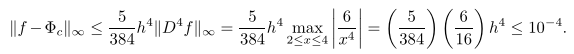 

Preto $h^4\le  (1/30)(384)(16)10^{-4}$, odkiaľ $h\le0.38$ a $N\ge2/0.38=6$. Spomeňte si (viď Príklad 8), že aproximácia po častiach lineárnym interpolantom vyžadovala $N\ge36$ pre dosiahnutie rovnakej chyby. 

---

---

#### Poznámka 14 

Splnenie podmienok $\Phi_c'(x_0)=f'(x_0)$, $\Phi_c'(x_N)=f'(x_N)$ môže byť obtiažne v prípade, keď funkcia resp. jej predpis nie je explicitne daný. Vtedy je možné pre požadované derivácie využiť aproximácie (viac v téme 3), ktoré sú rádu $h^4$ resp. ich chyba je $\mathcal{O}\left(h^4\right)$. Príkladom takých aproximácií sú tieto vzorce, kde *error* značí chybový člen resp. zvyšok:  

\begin{align*} 
f'(x_0)&=\dfrac{1}{12h}\left[-25f(x_0)+48f(x_0+h)-36f(x_0+2h)+16f(x_0+3h)-3f(x_0+4h)\right] + E\\
\\
& \text{kde } E \text{ je chyba, pre ktorú platí} 
\\ 
\\
E & = \dfrac{h^4}{5}f^{(5)}(\xi_1), \quad x_0\le\xi_1\le x_0+4h; 
\end{align*} 

\begin{align*} 
f'(x_0)&=\dfrac{1}{12h}\left[25f(x_N)-48f(x_N-h)+36f(x_N-2h)-16f(x_N-3h)+3f(x_N-4h)\right] + E\\
\\
& \text{kde } E \text{ je chyba, pre ktorú platí} 
\\ 
\\
E & = \dfrac{h^4}{5}f^{(5)}(\xi_2), \quad x_N\le\xi_2\le x_N-4h. 
\end{align*}

---

---

#### Poznámka 15 

Dá sa ukázať, že ak $u$ je ľubovoľná funkcia z triedy $C^2\langle a,b\rangle$ taká, že interpoluje funkciu $f$ v nasledujúcom zmysle (resp. je ukotvená nasledujúcimi podmienkami) 

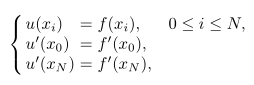 

potom platí 

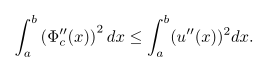 

To vlastne znamená, že ukotvený kubický splajnový interpolant je najhladší spomedzi všetkých ukotvených $C^2$-interpolantov na intervale $\langle a,b \rangle$, konkrétne najhladší v zmysle minimalizácie výrazu $\displaystyle\int_{a}^{b}\left(u''(x)\right)^2\,\mathrm{d}x$ (pričom druhá derivácia funkcie resp. krivky súvisí s jej zakrivením). 

---

--- 

#### <font color=blue> Príklad 10 </font> 

Porovnanie po častiach-polynomických interpolantov. Konkrétne ide o po častiach-lineárny/kvadratický/kubický interpolant. Všimnime si, že zelená a červená krivka dosť splývajú (na pravom konci sa trochu odlišujú). Nalepšie sa javí po častiach-kubický interpolant. 


In [42]:
from scipy import interpolate 

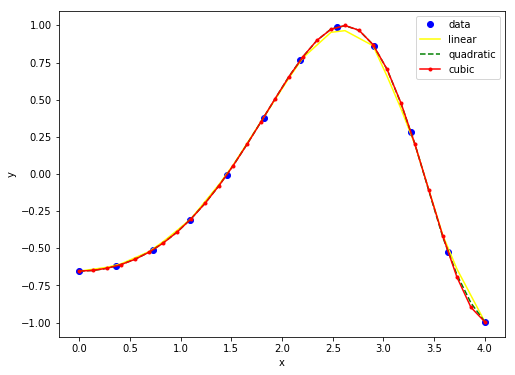

In [43]:
# interpolacne uzly 
x = np.linspace(0, 4, 12)
y = np.cos(x**2/3+4) 

# po castiach-linearny/kvadraticky/kubicky interpolant  

f1 = interpolate.interp1d(x, y,kind = 'linear')
f2 = interpolate.interp1d(x, y, kind = 'quadratic')
f3 = interpolate.interp1d(x, y, kind = 'cubic') 

# body potrebne k vykresleniu grafov jednotlivych interpolantov 
xnew = np.linspace(0, 4,30)

# graficke porovnanie po castiach-polynomickych interpolacii 
colors = ['blue','yellow','green','red']
plt.figure(figsize = (8,6)) 
plt.gca().set_prop_cycle(color = colors)
# plt.plot(x, y, 'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), '.-') 
plt.plot(x, y, 'o') 
plt.plot(xnew, f1(xnew), '-') 
plt.plot(xnew, f2(xnew), '--') 
plt.plot(xnew, f3(xnew), '.-') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.legend(['data', 'linear', 'quadratic','cubic'], loc = 'best')
plt.show()

--- 

---

#### <font color=blue> Príklad 11 </font> 

Najprv s využitím balíka *SciPy* (jeho modulu *interpolate*) a funkcie `CubicSpline()` urobíme interpoláciu pomocou prirodzeného kubického splajnu na intervale $0\le x \le 2$, pričom máme danú množinu bodov $[0,1]$, $[1,3]$, $[2,2]$. 


In [33]:
from scipy.interpolate import CubicSpline

plt.style.use('seaborn-poster')

In [63]:
x = [0, 1, 2]
y = [1, 3, 2]

# vstupny parameter bc_type = 'natural' zabezpeci, ze sa pouzije tzv. prirodzeny kubicky splajn  
Phi_n = CubicSpline(x, y, bc_type='natural') # prirodzeny kubicky splajn prechadzajuci zadanymi troma bodmi 
x_new = np.linspace(0, 2, 100) # vygenerujeme 100 bodov v intervale <0,2> (kvoli vykresleniu grafu pre splajn)
y_new = Phi_n(x_new) # aproximovane funkcne hodnoty vo vygenerovanych 100 bodoch z intervalu <0,2> (kvoli vykresleniu grafu pre splajn)

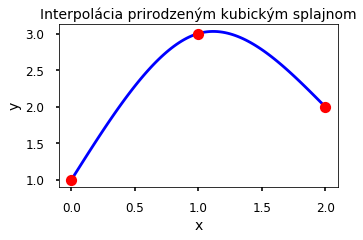

In [64]:
plt.figure(figsize = (5,3))
plt.plot(x_new, y_new, 'b') # vykreslenie splajnu 
plt.plot(x, y, 'ro') # znazornenie povodnych/zadanych bodov, ktorymi splajn prechadza 
plt.title('Interpolácia prirodzeným kubickým splajnom', fontsize=14)
plt.xlabel('x', fontsize=14) 
plt.xticks(fontsize=12)
plt.ylabel('y', fontsize=14) 
plt.yticks(fontsize=12)
plt.show()

Ďalej nájdeme kubický splajn i analyticky. Jedna možnosť by bola postupovať podľa dôkazu Tvrdenia 3, tzn. nájsť výsledný splajn ako lineárnu kombináciu bázických funkcií. K tomu je potrebné nájsť koeficienty lineárnej kombinácie a teda vyriešiť príslušnú sústavu rovníc. Ukážeme si teraz ale iný prístup. Vo všeobecnoti, ak máme zadaných $n$ bodov (uzlov) $[x_1,y_1], \ldots, [x_n,y_n]$, tak vieme, že výsledný splajn bude pozostávať z $n-1$ polynómov tretieho stupňa (každý môže byť iný), pričom každý z polynómov bude spájať dva susedné body (uzly - viď obrázok pod Definíciou 4). Označme tieto polynómy $S_i(x)=a_ix_i^3+b_ix_i^2+c_ix_i+d_i$ pre $i=1,2,\ldots, n-1$. Miesto podmienok v Definícii 7, kde boli kladené podmienky na výsledný kubický splajn, sformulujme nasledujúce podmienky pre jednotlivé kubické polynómy, z ktorých splajn pozostáva: 

* Kubické polynómy musia spájať dva susedné body (uzly), preto musí platiť (vznikne $2(n-1)$ rovníc):  

$$S_i(x_i)=y_i, \quad i=1,2,\ldots,n-1,$$ 

$$S_{i}(x_{i+1})=y_{i+1}\quad i=1,2,\ldots,n-1.$$


* Ďalej požadujeme aby sa kubické polynómy medzi sebou "napájali" čo najhladšie resp. najplynulejšie, preto požadujeme (vznikne $2(n-2)$ rovníc):

$$S_i'(x_{i+1})=S_{i+1}'(x_{i+1}), \quad i=1,2,\ldots,n-2,$$ 

$$S_{i}''(x_{i+1})=S_{i+1}''(x_{i+1})\quad i=1,2,\ldots,n-2.$$ 


* Pre jednoznačné určenie všetkých koeficientov kubických polynómov sú potrebné ešte dve rovnice a tie sa určujú zväčša podľa toho, aký typ splajnu chceme/potrebujeme získať; my doplníme tieto dve rovnice (pre prirodzený splajn): 

$$S_1''(x_1)=0,$$ 

$$S_n''(x_n)=0.$$ 

Rozpísaním podmienok pre našu konkrétnu úlohu by sme dostali sústavu rovníc v tvare $\mathbf{A}\mathbf{x}=\mathbf{y}$, kde $\mathbf{A}$ je matica koeficientov sústavy, vektor $\mathbf{x}=(a_1,b_1,c_1,d_1,a_2,b_2,c_2,d_2)'$ obsahuje hľadané koeficienty kubických polynómov a $\mathbf{y}=(1,3,3,2,0,0,0,0)'$ je vektor pravých strán. Po vyriešení tejto sústavy rovníc by sme získali kubické polynómy v nasledujúcom tvare: 

$$S_1(x)=-0.75x^3+2.75x+1,\quad0\le x \le 1;$$

$$S_2(x)=0.75x^3-4.5x^2+7.25x-0.5, \quad 1\le x \le 2.$$

Posledné dve podmienky uvedené vyššie sa možu v Python-ovskej implementácii líšiť a je možné ich nastaviť pomocou vstupného parametra `bc_type` funkcie `CubicSpline()`. 

Na záver ešte aproximujeme hodnotu neznámej funkcie $f$ v bode $x=1.5$, čím dostaneme $\Phi_n(1.5)=S_2(1.5)=2.78125$. 

In [79]:
# koeficienty (po stlpcoch) polynomov S_1(x) a S_2(x), z ktorych splajn pozostava 
# avsak, nie su to presne koeficienty a_1,b_1,c_1,d_1,a_2,b_2,c_2,d_2 zavedene vyssie v texte !! 
# pre viac detailov pozrite dokumentaciu https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html
# podstatne je vsimnut si najma toto: 
# For example, if y is 1-d, then c[k, i] is a coefficient for (x-x[i])**(3-k) on the segment between x[i] and x[i+1].
Phi_n.c

array([[-0.75,  0.75],
       [ 0.  , -2.25],
       [ 2.75,  0.5 ],
       [ 1.  ,  3.  ]])

In [66]:
# aproximacia funkcnej hodnoty v bode x=1.5 pomocou prirodzeneho kubickeho splajnu 
Phi_n(1.5)

array(2.78125)

In [80]:
# kontrolny vypocet, ci S_2(1.5) = 2.78125 
# je potrebne zohladnit poznamku v dokumentacii funkcie CubicSpline:  
# For example, if y is 1-d, then c[k, i] is a coefficient for (x-x[i])**(3-k) on the segment between x[i] and x[i+1]. 
# S1 = lambda x: -0.75*x**3-0*x**2+2.75*x+1
S2 = lambda x: 0.75*(x-1)**3-2.25*(x-1)**2+0.5*(x-1)+3 
# print(S1(1.5)) 
print(S2(1.5))

2.78125


--- 

***
<a id=mns></a>
 # <font color=brown> Aproximácia metódou najmenších štvorcov (na konečnej množine)  </font>

V súvislosti s polynómami je možné aproximáciu funkcie $f\in C\langle a,b \rangle$ metódou najmenších štvorcov (MNŠ) formulovať tak, že hľadáme $p_n\in P^n$ (polynóm $p_n$ z množiny $P^n$ polynómov stupňa $n$) taký, aby spĺňal $\parallel f-p_n\parallel_2\, \le \,\parallel f-q_n \parallel_2$ pre všetky $q_n\in P^n$. Teraz však budeme uvažovať MNŠ na konečnej množine. 

<ins> Formulácia problému: </ins>  

Nech $G\subset\mathbb{R}$ a $x_i\in G$ pre $i=1,2,\ldots, N$. Ďalej nech je daných $N$ bodov $[x_1,y_1]$, $[x_2,y_2]$, $\ldots$, $[x_N,y_N]$ a taktiež $n$ funkcií $u_1,u_2,\ldots,u_n$ definovaných na $G$, pričom $n\le N$. <br/>
Úlohou je nájsť funkciu $u$ v tvare 

$$u(x)=\displaystyle\sum\limits_{k=1}^{n}\lambda_ku_k(x),$$ 

ktorá bude aproximovať hodnoty $y_1,y_2,\dots y_N$ v bodoch $x_1, x_2, \ldots, x_N$. 

Napr. ak $u_1(x)=1$, $u_2(x)=x$, potom $u(x)=\lambda_1+\lambda_2x$ môže byť priamka znázornená na nasledujúcom obrázku (všimnime si, že súradnice $x_i$ nemusia byť rôzne). 

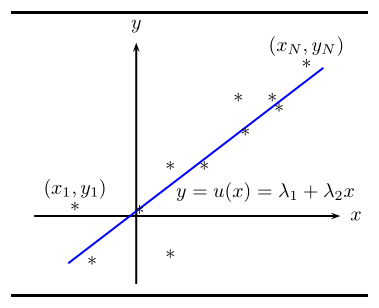 
$$\text{Zdroj: Ackleh et al. (2009).}$$  

Uvedený problém sa zvykne nazývať **_lineárny problém najmenších štvorcov_**. I keď hľadaná (prekladaná resp. fitovaná) funkcia $u=\sum\lambda_ku_k$ nemusí byť lineárna, tak $u$ je lineárnou kombináciou funkcií $u_1,\ldots,u_n$, pričom koeficenty tejto lineárnej kombinácie sú $\lambda_1,\ldots,\lambda_k$ a je možné ich získať technikami lineárnej algebry. 

Riešenie problému najmenších štvorcov spočíva v nájdení koeficientov $\lambda_1,\ldots,\lambda_n$ takých, ktoré minimalizujú súčet 

\begin{align*} \label{eq:MNS} \tag{11} 
\displaystyle\sum\limits_{j=1}^{N}\left(y_j-\sum\limits_{k=1}^{n}\lambda_ku_k(x_j)\right)^2.
\end{align*}

Nasledujúci obrázok znázorňuje MNŠ a objasňuje i samotný názov tejto metódy. 

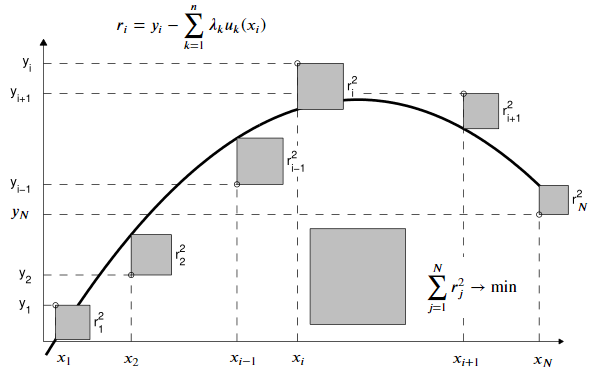 


---

#### Poznámka 16 

Naznačený lineárny problém najmenších štvorcov je možné prirodzene rozšíriť do viacerých rozmerov, kde potom $G\subset\mathbb{R}^m$. 

---

---

#### Poznámka 17 

Tu uvažujeme funkcie $u_1,\ldots,u_n$ v tvare mocnín $x$, tzn. napr. $u_i(x)=x^{i-1}$, $i=1,2,\ldots,n$. Používajú sa však aj iné funkcie ako napr. $u_1(x)=1$, $u_{2l}(x)=\sin(lx)$, $u_{2l+1}(x)=\cos(lx)$, $l=1,2,\ldots,m$, $n=2m+l$ - v tomto prípade ide o tzv. *diskrétnu harmonickú aproximáciu*.  

---

---

#### Poznámka 18 

Ak $n=2$, $u_1(x)=1$, $u_2(x)=x$, potom sa problém najmenších štvorcov redukuje na známy problém "prekladania" priamky dátami (pripomína lineárnu regresiu), t. j. hľadajú sa také koeficienty $\lambda_1$, $\lambda_2$, ktoré minimalizujú výraz $\displaystyle\sum\limits_{j=1}^{n}\left(y_j-(\lambda_1+\lambda_2x_j)\right)^2$. 

---

Zaveďme takéto vektory: $\mathbf{y}=\left(y_1,y_2,\ldots,y_N\right)'\in\mathbb{R}^N$, $\mathbf{u}_k=\left(u_k(x_1),u_k(x_2),\ldots,u_k(x_N)\right)'\in\mathbb{R}^N$ pre $k=1,2,\ldots,n$. Potom problém $(11)$ je vlastne problém minimalizácie skalárneho súčinu $\mathbf{z}'\mathbf{z}$, kde $\mathbf{z}=\mathbf{y}-\mathbf{w}$ a $\mathbf{w}=\displaystyle\sum\limits_{k=1}^{n}\lambda_k\mathbf{u}_k$. Preto lineárny problém najmenších štvorcov (uvedený vyššie) je možné stotožniť s nasledujúcou úlohou: Je daný vektorový priestor $V=\mathbb{R}^N$ a podpriestor $W\subset V$ je daný ako lineárny obal množiny vektorov $\{\mathbf{u}_1,\ldots,\mathbf{u_n}\}$; nájdite $\mathbf{w}\in W$ taký, aby platilo 

$$\parallel \mathbf{y} - \mathbf{w} \parallel^2=(\mathbf{y} - \mathbf{w})'(\mathbf{y} - \mathbf{w})\le\parallel \mathbf{y} - \mathbf{u} \parallel^2,$$ 

pre všetky $\mathbf{u}\in W$.

V zmysle všeobecnejšej teórie je teda vektor $\mathbf{w}$ najlepšou aproximáciou vektora $\mathbf{y}$ v priestore $\mathbb{R}^N$ so skalárnym súčinom a koeficienty $\lambda_k$ spĺňajú systém lineárnych rovníc: 

\begin{align*} \label{eq:koefMNS} \tag{12} 
\displaystyle\sum\limits_{k=1}^{n}\lambda_k\mathbf{u}_k'\mathbf{u}_j=\mathbf{y}'\mathbf{u}_j,\quad j=1,2,\ldots,n.
\end{align*}

Preto $\mathbf{w}=\displaystyle\sum\limits_{k=1}^{n}\lambda_k\mathbf{u}_k$ aproximuje $\mathbf{y}$ a $w(x)=\displaystyle\sum\limits_{k=1}^{n}\lambda_ku_k(x)$ je riešením problému najmenších štvorcov. **Uvedomme si, že vektor $\mathbf{w}$ je v konečnom dôsledku kolmý priemet vektora $\mathbf{y}$ do podpriestoru $W$.**  

Za účelom nájdenia koeficientov $\lambda_k$ z \eqref{eq:koefMNS} sa predpokladá, že $\mathbf{u}_k$, $1\le k \le n$ sú lineárne nezávislé vektory z $\mathbb{R}^N$. Preto funkcie $u_1(x),\ldots,u_n(x)$ musia byť lineárne nezávislé na množine $\{x_1,\ldots,x_N\}\subset G$. 

Sústavu rovníc \eqref{eq:koefMNS} je možné zapísať kompaktne i v maticovom tvare týmto spôsobom: 

\begin{align*} \label{eq:koefMNS2} \tag{13} 
\mathbf{A}'\mathbf{A}\mathbf{\lambda}=\mathbf{A}'\mathbf{y},
\end{align*}

kde $\mathbf{A}=(\mathbf{u}_1,\ldots,\mathbf{u}_n)$ je matica typu $N\times n$ a $\mathbf{\lambda}=(\lambda_1,\ldots,\lambda_n)'$ je vektor hľadaných koeficientov. 


---

#### Poznámka 19 

Matica $\mathbf{A}'\mathbf{A}$ je regulárna (dokonca pozitívne definitná) vtedy a len vtedy, keď sú vektory $\mathbf{u}_1,\ldots,\mathbf{u}_n$ lineárne nezávislé. Je to vidieť z nasledujúcich vzťahov: 

$$\mathbf{x}'\mathbf{A}'\mathbf{A}\mathbf{x}=\displaystyle\sum\limits_{i,j=1}^{n}(x_i\mathbf{u}_i)'(x_j\mathbf{u}_j)\left(\displaystyle\sum\limits_{i=1}^{n}x_i\mathbf{u}_i\right)'\left(\displaystyle\sum\limits_{j=1}^{n}x_j\mathbf{u}_j\right)\ge0$$

Zrejme matica $\mathbf{A}'\mathbf{A}$ je singulárna práve vtedy, keď $\mathbf{x}'\mathbf{A}'\mathbf{A}\mathbf{x}=0$ pre nejaké $\mathbf{x}\neq\mathbf{0}$. Avšak $\mathbf{x}'\mathbf{A}'\mathbf{A}\mathbf{x}=0$ práve vtedy, keď $\displaystyle\sum\limits_{i=1}^{n}x_i\mathbf{u}_i=\mathbf{0}$. Ďalej pre $\mathbf{x}\neq\mathbf{0}$ je $\displaystyle\sum\limits_{i=1}^{n}x_i\mathbf{u}_i=\mathbf{0}$ vtedy a len vtedy, keď $\mathbf{u}_1,\ldots,\mathbf{u}_n$ sú lineárne závislé. Tým pádom matica $\mathbf{A}'\mathbf{A}$ je singulárna práve vtedy, keď $\mathbf{u}_1,\ldots,\mathbf{u}_n$ sú lineárne závislé. 

---

Predošlá diskusia je zhrnutá v ďalšej vete. 

--- 

### <font color=green> Veta 8 </font> 

Nech $G\subset\mathbb{R}$ a $x_i\in G$ pre $i=1,2,\ldots,N$. Ďalej predpokladajme, že je daných $N$ bodov s reálnymi súradnicami $[x_1,y_1],\ldots,[x_N,y_N]$ a funkcie $u_1(x),\ldots,u_n(x)$ sú lineárne nezávislé na množine $\{x_1,\ldots,x_N\}$. Potom riešenie problému najmenšíc štvorcov, ktoré je v tvare 

$$w(x)=\displaystyle\sum\limits_{k=1}^{n}\lambda_ku_k(x)$$

a minimalizuje hodnotu výrazu 

$$\displaystyle\sum\limits_{j=1}^{N}\left(y_j-w(x_j)\right)^2$$ 

je určené jednoznačne a je dané riešením sústavy lineárnych rovníc, tzv. **_normálna sústava rovníc_**

$$\mathbf{A}'\mathbf{A}\mathbf{\lambda}=\mathbf{A}'\mathbf{y},$$ 

kde $\mathbf{A}=(\mathbf{u}_1,\ldots,\mathbf{u}_n)$, $\mathbf{\lambda}=(\lambda_1,\ldots.\lambda_n)'$, $\mathbf{y}=(y_1,\ldots,y_N)'$ a $\mathbf{u}_k=(u_k(x_1),\ldots,u_k(x_N))'$. 

---

---

#### Poznámka 20 

Ak zvolíme $u_i(x)=x^{i-1}$ pre $i=1,2,\ldots,n$, tak dostaneme tzv. **_vyhladzovacie polynómy_** (ang. *smoothing polynomials*). 
 
---

--- 

#### <font color=green> Tvrdenie 4 </font> 

Predpokladajme, že aspoň $n\le N$ bodov medzi $x_1,\ldots,x_N$ je navzájom rôznych. Potom $u_1(x),\ldots,u_n(x)$ sú lineárne nezávislé na $G\subset\mathbb{R}$, pričom $u_i(x)=x^{i-1}$ pre $i=1,2,\ldots,n$ (teda rešenie úlohy najmenších štvorcov existuje a je jednoznačné určené podľa Vety 8). 

---

Predpokladajme teraz, že množina reálnych čísel $\{x_1,x_2,\ldots,x_N\}$ obsahuje aspoň $n\le N$ rôznych hodnôt. Potom 

$$\mathbf{A}=\begin{pmatrix}
1 & x_1 & \ldots & x_1^{n-1} \\ 
1 & x_2 & \ldots & x_2^{n-1} \\ 
\vdots & \vdots & & \vdots \\ 
1 & x_N & \ldots & x_N^{n-1}
\end{pmatrix}$$ 

a $\mathbf{A}'\mathbf{A}\mathbf{\lambda}=\mathbf{A}'\mathbf{y}$ má tvar 

$$\begin{pmatrix}
N & \displaystyle\sum\limits_{i=1}^{N}x_i & \displaystyle\sum\limits_{i=1}^{N}x_i^2 & \ldots & \displaystyle\sum\limits_{i=1}^{N}x_i^{n-1} \\ 
\displaystyle\sum\limits_{i=1}^{N}x_i & \displaystyle\sum\limits_{i=1}^{N}x_i^2 & \ldots & & \displaystyle\sum\limits_{i=1}^{N}x_i^n \\ 
\vdots & & &  & \vdots \\ 
\displaystyle\sum\limits_{i=1}^{N}x_i^{n-1} & & \ldots & & \displaystyle\sum\limits_{i=1}^{N}x_i^{2n-2}
\end{pmatrix}
\begin{pmatrix}
\lambda_1 \\
 \\
\lambda_2 \\ 
 \\
\vdots \\ 
 \\
 \\ 
\lambda_n
\end{pmatrix}=
\begin{pmatrix}
\displaystyle\sum\limits_{i=1}^{N}y_i \\
\displaystyle\sum\limits_{i=1}^{N}x_iy_i \\ 
\vdots \\
\displaystyle\sum\limits_{i=1}^{N}x_i^{n-1}y_i
\end{pmatrix},$$

kde $w(x)=\displaystyle\sum\limits_{i=1}^{n}\lambda_ix^{i-1}$ je tzv. **_vyhladzovací polynóm_** (ang. *smoothing polynomial*) prechádzajúci blízko daných bodov $[x_1,y_1],\ldots,[x_N,y_N]$. 


---

#### <font color=blue> Príklad 12 </font> 

Metódou najmenších štvorcov nájdite parabolu v tvare $w(x)=\lambda_1+\lambda_2x+\lambda_3x^2$, ak sú dané body $[0,0],[1,2],[2,3],[3,10]$. 

<ins> Riešenie: </ins>

V tomto príklade je $N=4$ a $n=3$. Máme nasledovnú tabuľku hodnôt: 

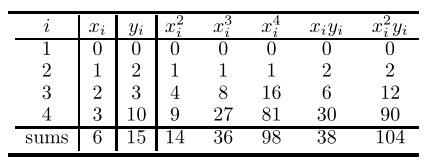 
$$\text{Zdroj: Ackleh et al. (2009).}$$ 

Tým pádom sústava normálnych rovníc má tvar 

$$\begin{pmatrix}
4 & 6 & 14 \\ 
6 & 14 & 36 \\ 
14 & 36 & 98
\end{pmatrix}
\begin{pmatrix}
\lambda_1 \\ 
\lambda_2 \\ 
\lambda_3
\end{pmatrix}=\begin{pmatrix}
15 \\ 
38 \\ 
104
\end{pmatrix}.$$

Vyriešením dostaneme $\lambda_1=0.35$, $\lambda_2=-0.65$, $\lambda_3=1.25$ a hľadaná parabola má predpis $w(x)=0.35-0.65x+1.25x^2$. 


In [75]:
# riesenie pomocou balika NumPy 
A = np.array([[4,6,14],[6,14,36],[14,36,98]]) 
print('Matica A:')
print(A)
y = np.array([15,38,104])
print('Vektor y:')
print(y)
lambd1 = np.linalg.lstsq(A, y, rcond=None)[0]
print('Vektor koeficientov lambda:')
print(lambd1)

Matica A:
[[ 4  6 14]
 [ 6 14 36]
 [14 36 98]]
Vektor y:
[ 15  38 104]
Vektor koeficientov lambda:
[ 0.35 -0.65  1.25]


In [78]:
# riesenie pomocou balika SciPy
from scipy.optimize import curve_fit

# generate x and y
x = np.array([0,1,2,3])
y = np.array([0,2,3,10]) 

def func(x, a, b, c):
    y = c*x**2 + b*x + a
    return y

lambd2 = curve_fit(func, xdata = x, ydata = y)[0] 
print('Vektor koeficientov lambda:')
print(lambd2) 

Vektor koeficientov lambda:
[ 0.35 -0.65  1.25]


--- 

<font color=orange> Vykreslite parabolu získanú metódou najmenších štvorcov v Príklade 12. Zistite, aká presná je aproximácia touto parabolou v zadaných bodoch. </font> 

---

#### Poznámka 21 

Tzv. **_normálne rovnice_** (resp. sústava normálnych rovníc) použité v Príklade 12 sa využívajú najmä pre teoretické či ilustračné účely. Moderný softvér má implementované techniky ako napr. *QR-rozklad* (bude neskôr), pretože matica $\mathbf{A}'\mathbf{A}$ je častokrát zle podmienená (blízka singulárnej matici), čo v praktických výpočtoch s konečnou presnosťou spôsobuje problémy. Výpočet $QR$-dekompozície (alebo *rozkladu matice na singulárne čísla*) je numericky stabilnejší ako riešenie systému normálnych rovníc.  
 
---

---

#### Poznámka 22 

Existujú samozrejme aj ďalšie možnosti aproximácie funkcií (pomocou iných typov bázických funkcií). Dobrým príkladom je aproximácia s využitím trigonometrických funkcií (Fourierove rady, rýchla Fourierova transformácia - FFT), ktorá zohrala veľkú úlohu v aplikovanej matematike a je dôležitá i v modernej technológii spracovania signálov, ako je ukladanie a prenos audio či video signálov. Známa je napr. i tzv. racionálna aproximácia (zahŕňajúca podiely polynómov) či aproximácia využívajúca tzv. vlnkové funkcie (ang. *wavelets*; waveletove bázy). 
 
---

***
<a id=zdroje></a>
 # <font color=brown> Použité zdroje</font> 

* Ackleh, A.S., Allen, E.J., Kearfott, R.B., & Seshaiyer, P. (2009). Classical and Modern Numerical Analysis: Theory, Methods and Practice. Chapman and Hall/CRC. 


* Burden, R. L., & Faires, J. D. (2011). Numerical analysis. Brooks/Cole, Cengage Learning. 


* Čermák, L. (2020). Numerické metody. Ústav matematiky FSI VUT v Brně. 


* Fajmon, B., Hlavičková, I., Novák, M., Vítovec, J. (2014). Numerická matematika a pravděpodobnost. Ústav matematiky FEKT VUT v Brně. 


* Gezerlis, A. (2020). Numerical methods in physics with Python. Cambridge University Press. 


* Gilli, M., Maringer, D., Schumann, E. (2019). Numerical Methods and Optimization in Finance. Elsevier/Academic Press. 


* Kiusalaas, J. (2013). Numerical Methods in Engineering with Python 3. Cambridge University Press, USA.


* Kincaid, D., & Cheney, E. W. (2002). Numerical analysis: Mathematics of scientific computing. Pacific Grove, CA: Brooks/Cole.


* Kiseľák, J. (2020). Základy numerických metód. ÚMV PF UPJŠ. 


* Kong, Q., Siauw, T., Bayen, A. (2020). [Python Programming and Numerical Methods: A Guide for Engineers and Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html). Academic Press. 


* Oršanský, P., Ftorek B. (2021). Štatistické a numerické metódy. EDIS - UNIZA.


* Růžičková, I. & Hlavička, R. (2020). Numerické metody. Ústav matematiky FSI VUT v Brně. 


* Sauer, T. (2011). Numerical Analysis. Addison-Wesley Publishing Company, USA. 


* Sullivan, E. (2020). Numerical Methods: An Inquiry-Based Approach With Python. Faculty Publications. 